![miad4.png](Archivos/miad4.png)

# Laboratorio 2

## Desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Para el desarrollo de esta actividad puedes utilizar cualquier librería externa. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando métodos de librerías especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
5. Implementar análisis basado en modelos estadísticos o de *machine learning*.

##  Contexto: desigualdad y factores de éxito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (ej., matemáticas, física, inglés, etc.) y se lleva a cabo dos veces al año, ajustándose a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge información sociodemográfica y relacionada con la institución a la que pertenecen. El fin es obtener información con respecto al desempeño de los estudiantes en la prueba y de sus características.

![msaberpro.png](Archivos/saberpro.png)

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es la desigualdad y factores de éxito en las pruebas Saber 11. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus características principales y seleccionar las partes de dicho contenido que podrían ser relevantes para el análisis.


* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones y estadísticas descriptivas.


* Proponer un modelo que busque relacionar las variables de interés con el desempeño de los estudiantes y concluir acerca de los posibles hallazgos que se podrían reportar para el *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los parámetros del análisis realizado de forma relevante en el contexto del problema.

## Fase 1: obtener e inspeccionar archivos

En esta fase te harás una idea general del contenido de los datos y generarás un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Además, seleccionarás un segmento de los datos que consideres útil para realizar tu análisis.

Pautas generales:

* Utilizar una librería especializada para leer los archivos de datos y agregarlos según sea necesario (ej., utilizando los métodos `append` o `concat` si eliges cargarlos utilizando la librería `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables según su tipo (ej., numéricas, categóricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problemática de interés.

Preguntas guía:

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

In [3]:
!pip install sodapy
!pip install gdown
!pip install sweetviz
!pip install matplotlib

     |████████████████████████████████| 62 kB 1.1 MB/s             
     |████████████████████████████████| 53 kB 9.9 MB/s             
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 399 kB 2.9 MB/s            
     |████████████████████████████████| 296 kB 119.0 MB/s            
     |████████████████████████████████| 488 kB 116.7 MB/s            
     |████████████████████████████████| 9.9 MB 104.7 MB/s            
     |████████████████████████████████| 381 kB 122.0 MB/s            
     |████████████████████████████████| 92 kB 51.8 MB/s             
  Installing build dependencies ... done
  Getting requirements to build wheel ...

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output, HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import ipywidgets as widgets
import gdown

In [5]:
#los cargos desde el drive, ya que en datosabiertos no estan, igualmente puede ingresar a revisar si quieren los datos 
# https://drive.google.com/drive/folders/1VTLj7El1RX2Es5tIPNXtZqfsNTuVWPEZ?usp=drive_link



files = {
    "2018": {"1": "1mgw7Z6xnPZDE3pQ4yPxNSgNZSEEpo5M8", 
             "2": "1fmc05uWHbTMO_5c_KJsDZg76fDiE7uZ-"},
    "2021": {"1": "16aPqkXPoKTum98OevZlb83kVdEB2b-Cc", 
             "2": "1gWKxdwisAAkSqcPus7c9vyoi0OcvCZND"},
    "2024": {"1": "1GWjV001VdKzkOOvMxlZM4U7QHv71Y2qy", 
             "2": "1-flX8bhqUtFmfFVpDFTyam-InXnahEGV"}
}

def descargar(file_id, filename):
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, filename, quiet=False)
    return filename

def contar_filas_local(filename):
    with open(filename, "r", encoding="latin1") as f:
        n = sum(1 for _ in f) - 1
    return n

def cargar_muestras(anios):
    local_files = {}
    
    # descargar
    for year in anios:
        local_files[year] = {}
        for semestre, fid in files[year].items():
            fname = f"saber_{year}_{semestre}.txt"
            descargar(fid, fname)
            local_files[year][semestre] = fname

    tam_por_semestre = {}
    for year, periods in local_files.items():
        n1 = contar_filas_local(periods["1"])
        n2 = contar_filas_local(periods["2"])
        tam_por_semestre[year] = {"1": n1, "2": n2}

    print("Tamaños por semestre:", tam_por_semestre)

    min_periodo1 = min(d["1"] for y,d in tam_por_semestre.items() if y in anios)
    print(f"Minimo en periodo 1 entre {anios}: {min_periodo1}")


    df_final = pd.DataFrame()

    for year in anios:
        periods = local_files[year]
        n1_target = min_periodo1
        n2_target = min_periodo1
        total = n1_target + n2_target

        df1 = pd.read_csv(periods["1"], sep=";", encoding="utf-8")
        df1 = df1.sample(n=n1_target, random_state=42)

        df2 = pd.read_csv(periods["2"], sep=";", encoding="utf-8")
        df2 = df2.sample(n=n2_target, random_state=42)

        df_year = pd.concat([df1, df2], ignore_index=True)
        df_year["año"] = year
        df_final = pd.concat([df_final, df_year], ignore_index=True)

    print("Dataset final:", df_final.shape)
    return df_final

In [6]:
df_final= cargar_muestras(["2018","2021","2024"])

Downloading...
From: https://drive.google.com/uc?id=1mgw7Z6xnPZDE3pQ4yPxNSgNZSEEpo5M8
To: /home/jovyan/work/saber_2018_1.txt
100%|██████████| 25.2M/25.2M [00:00<00:00, 139MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1fmc05uWHbTMO_5c_KJsDZg76fDiE7uZ-
From (redirected): https://drive.google.com/uc?id=1fmc05uWHbTMO_5c_KJsDZg76fDiE7uZ-&confirm=t&uuid=959b35f4-4608-4ce2-b5ee-4a61bc40769d
To: /home/jovyan/work/saber_2018_2.txt
100%|██████████| 422M/422M [00:03<00:00, 114MB/s]  
Downloading...
From: https://drive.google.com/uc?id=16aPqkXPoKTum98OevZlb83kVdEB2b-Cc
To: /home/jovyan/work/saber_2021_1.txt
100%|██████████| 21.4M/21.4M [00:00<00:00, 105MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1gWKxdwisAAkSqcPus7c9vyoi0OcvCZND
From (redirected): https://drive.google.com/uc?id=1gWKxdwisAAkSqcPus7c9vyoi0OcvCZND&confirm=t&uuid=64ee9b38-0ffb-42ed-ba5c-1af218dc3771
To: /home/jovyan/work/saber_2021_2.txt
100%|██████████| 420M/420M [00:03<00:00, 130MB/s

Tamaños por semestre: {'2018': {'1': 65854, '2': 609136}, '2021': {'1': 58708, '2': 606030}, '2024': {'1': 84072, '2': 592436}}
Minimo en periodo 1 entre ['2018', '2021', '2024']: 58708
Dataset final: (352248, 87)


In [7]:
df_final

,periodo,estu_consecutivo,estu_estudiante,estu_tipodocumento,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,...,percentil_matematicas,percentil_sociales_ciudadanas,punt_c_naturales,punt_global,punt_ingles,punt_lectura_critica,punt_matematicas,punt_sociales_ciudadanas,estu_generacione,año
0,20181,SB11201810005761,ESTUDIANTE,TI,URBANO,N,B,ACADÉMICO,3.118480e+11,3.118480e+11,...,80,74,70,350,84.0,69,70,66,NaN,2018
1,20181,SB11201810037547,INDIVIDUAL,CC,NaN,NaN,NaN,NaN,NaN,NaN,...,35,51,61,296,58.0,67,51,58,NaN,2018
2,20181,SB11201810058210,INDIVIDUAL,TI,NaN,NaN,NaN,NaN,NaN,NaN,...,100,99,77,417,82.0,76,100,81,NaN,2018
3,20181,SB11201810052591,INDIVIDUAL,TI,NaN,NaN,NaN,NaN,NaN,NaN,...,81,77,68,342,71.0,67,71,67,NaN,2018
4,20181,SB11201810019351,INDIVIDUAL,CC,NaN,NaN,NaN,NaN,NaN,NaN,...,6,16,31,193,38.0,50,33,41,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352243,20242,SB11202430480874,ESTUDIANTE,TI,URBANO,N,A,ACADÉMICO,1.138360e+11,1.138360e+11,...,53,65,55,277,52.0,61,53,54,NaN,2024
352244,20242,SB11202430555951,ESTUDIANTE,CC,URBANO,S,A,ACADÉMICO,1.055790e+11,1.055790e+11,...,70,68,59,299,64.0,65,59,55,NaN,2024
352245,20242,SB11202430376940,ESTUDIANTE,TI,URBANO,N,A,ACADÉMICO,3.111020e+11,3.111020e+11,...,83,96,67,344,72.0,74,64,69,NaN,2024
352246,20242,SB11202430556653,ESTUDIANTE,TI,URBANO,N,A,ACADÉMICO,3.200010e+11,3.200010e+11,...,32,90,63,302,52.0,70,46,65,NaN,2024


In [8]:
df_final.describe()

,periodo,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,cole_cod_mcpio_ubicacion,cole_codigo_icfes,desemp_c_naturales,desemp_lectura_critica,desemp_matematicas,desemp_sociales_ciudadanas,...,percentil_ingles,percentil_lectura_critica,percentil_matematicas,percentil_sociales_ciudadanas,punt_c_naturales,punt_global,punt_ingles,punt_lectura_critica,punt_matematicas,punt_sociales_ciudadanas
count,352248.000000,2.085390e+05,2.085390e+05,208539.000000,208539.000000,208539.000000,352248.000000,352248.000000,352248.000000,352248.000000,...,350698.000000,352248.000000,352248.000000,352248.000000,352248.000000,352248.000000,350573.000000,352248.000000,352248.000000,352248.000000
mean,20211.500000,2.355856e+11,2.361618e+11,35.048149,35261.923597,242461.253363,2.233015,2.765571,2.539742,2.190905,...,42.376264,45.422035,45.741937,47.082297,51.553925,261.856519,52.759893,54.532826,52.514865,50.768152
std,24.500035,1.035972e+11,1.043635e+11,27.699561,27710.089949,270314.554033,0.807476,0.782561,0.800716,0.870213,...,28.016944,28.673529,28.563385,28.256825,11.408182,56.248155,14.520692,11.191323,13.310466,12.706681
min,20181.000000,1.050010e+11,1.050010e+11,5.000000,5001.000000,59.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20182.000000,1.254730e+11,1.254910e+11,11.000000,11001.000000,48298.000000,2.000000,2.000000,2.000000,2.000000,...,18.000000,20.000000,21.000000,23.000000,43.000000,218.000000,42.000000,46.000000,43.000000,41.000000
50%,20211.500000,2.230010e+11,2.230900e+11,23.000000,23555.000000,119339.000000,2.000000,3.000000,3.000000,2.000000,...,39.000000,43.000000,43.000000,45.000000,51.000000,259.000000,51.000000,55.000000,52.000000,51.000000
75%,20241.000000,3.151870e+11,3.152380e+11,68.000000,68001.000000,304436.000000,3.000000,3.000000,3.000000,3.000000,...,64.000000,69.000000,69.000000,71.000000,60.000000,303.000000,62.000000,63.000000,62.000000,60.000000
max,20242.000000,5.523990e+11,8.548740e+11,99.000000,99773.000000,819656.000000,4.000000,4.000000,4.000000,4.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,496.000000,100.000000,100.000000,100.000000,100.000000


In [9]:
def extraer_variables_tipo(df):
    numericas = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
    categoricas = df.select_dtypes(include=["object"]).columns.tolist()
    print(f"variables numéricas ({len(numericas)}):")
    print(" - " + " - ".join(numericas))
    print(f"\nvariables categóricas ({len(categoricas)}):")
    print(" - " + " - ".join(categoricas))
    return numericas,categoricas

def resumen_estructura(df):
    print("Dimensiones del DF:")
    print(f"Filas: {df.shape[0]:,}")
    print(f"Columnas: {df.shape[1]:,}")
    print("Columnas y Tipos de datos:")
    print(df.dtypes.value_counts())
    pd.set_option("display.max_rows", None)
    print(df.dtypes)
    pd.reset_option("display.max_rows")

def resumen_variables(df):
    resumen = pd.DataFrame({
        "tipo": df.dtypes,
        "valores_unicos": df.nunique(),
        "nulos_%": df.isnull().mean().round(3) * 100
    }).sort_values(by="nulos_%", ascending=True)
    print("Resumen de Variables")
    pd.set_option("display.max_rows", None) 
    print(resumen.head(60)) 
    pd.reset_option("display.max_rows") 
    return resumen


In [10]:
# metodo de ayuda: 
def analizar_columna(df, columna, top_n=15):
    total = len(df)
    serie = df[columna]
    tipo = serie.dtype
    n_nulos = serie.isna().sum()
    p_nulos = n_nulos / total * 100
    n_unicos = serie.nunique(dropna=True)
    print(f"columna: {columna}")
    print(f" Tipo de dato: {tipo}")
    print(f" Nulos: {n_nulos:,} ({p_nulos:.2f}%)")
    print(f" Valores únicos (NO NAN)  {n_unicos:,}")
    if pd.api.types.is_numeric_dtype(serie):
        print("\n Estadísticas numéricas:")
        print(serie.describe())
    else:
        print(f"\n Top {top_n} valores más frecuentes:")
        valores = serie.value_counts(dropna=False).head(top_n)
        for val, count in valores.items():
            porcentaje = count / total * 100
            print(f"  {val}: {count:,} ({porcentaje:.2f}%)")


In [11]:
resumen = resumen_variables(df_final)
numericas, categoricas = extraer_variables_tipo(df_final)

Resumen de Variables
                                  tipo  valores_unicos  nulos_%
periodo                          int64               6      0.0
estu_agregado                   object               2      0.0
estu_cod_depto_presentacion    float64              33      0.0
estu_cod_mcpio_presentacion    float64             546      0.0
estu_depto_presentacion         object              33      0.0
estu_discapacidad               object               2      0.0
estu_fechanacimiento            object           15161      0.0
estu_genero                     object               2      0.0
estu_mcpio_presentacion         object             530      0.0
estu_nacionalidad               object              59      0.0
estu_pais_reside                object              59      0.0
estu_privado_libertad           object               2      0.0
estu_repite                    float64           68339      0.0
percentil_c_naturales            int64             100      0.0
percentil_lectura_c

Resumen de Variables
                                  tipo  valores_unicos  nulos_%
periodo                          int64               6      0.0
estu_agregado                   object               2      0.0
estu_cod_depto_presentacion    float64              33      0.0
estu_cod_mcpio_presentacion    float64             546      0.0
estu_depto_presentacion         object              33      0.0
estu_discapacidad               object               2      0.0
estu_fechanacimiento            object           15161      0.0
estu_genero                     object               2      0.0
estu_mcpio_presentacion         object             530      0.0
estu_nacionalidad               object              59      0.0
estu_pais_reside                object              59      0.0
estu_privado_libertad           object               2      0.0
estu_repite                    float64           68339      0.0
percentil_c_naturales            int64             100      0.0
percentil_lectura_c

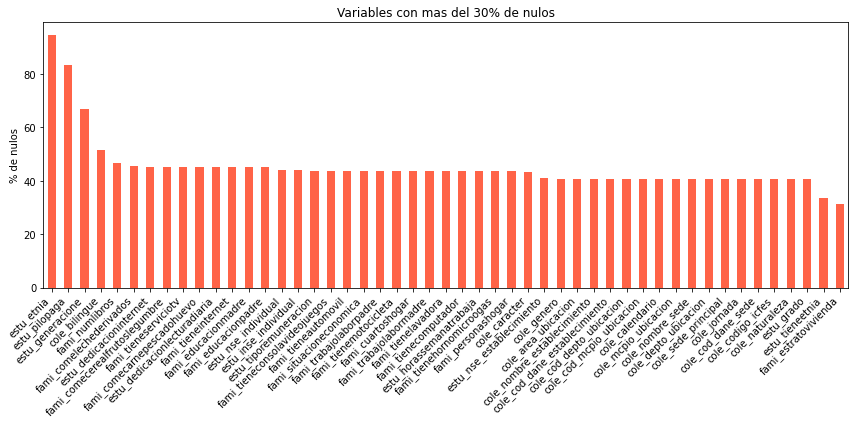

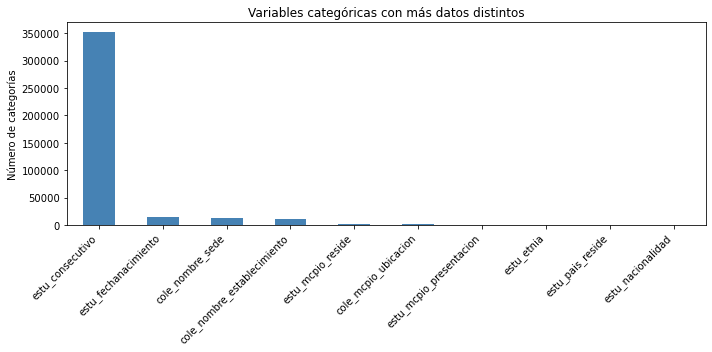

In [12]:
def visualizar_resumen(resumen, categoricas, umbral_nulos=30):
    # Filtrar variables con % de nulos mayor al umbral
    resumen_filtrado = resumen[resumen["nulos_%"] > umbral_nulos]
    # Barras de Nulos
    plt.figure(figsize=(12,6))
    resumen_filtrado["nulos_%"].sort_values(ascending=False).plot(kind="bar", color="tomato")
    plt.title(f"Variables con mas del {umbral_nulos}% de nulos")
    plt.ylabel("% de nulos")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Top categorías con valores distintos
    top_categoricas = resumen.loc[categoricas].sort_values("valores_unicos", ascending=False).head(10)
    plt.figure(figsize=(10,5))
    top_categoricas["valores_unicos"].plot(kind="bar", color="steelblue")
    plt.title("Variables categóricas con más datos distintos")
    plt.ylabel("Número de categorías")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

visualizar_resumen(resumen_variables(df_final), categoricas)

In [13]:
# ver si hay constantes y hacerle el drop luego 

constantes = resumen[resumen["valores_unicos"] <= 1]
print("Constantes:", constantes.index.tolist())
corr = df_final[numericas].corr().abs()
#ver correlaciones
redundantes = []
for i in corr.columns:
    for j in corr.columns:
        if i != j and corr.loc[i, j] > 0.95:
            redundantes.append(f"{i} - {j} | correlación: {corr.loc[i, j]:.3f}")

# Eliminar duplicados(ab = ba)
redundantes_unicos = []
agregados = set()
for r in redundantes:
    var1, var2 = r.split(" - ")[0], r.split(" - ")[1].split(" |")[0]
    clave = tuple(sorted([var1, var2]))
    if clave not in agregados:
        redundantes_unicos.append(r)
        agregados.add(clave)

print("Pares correlacionados:")
for r in redundantes_unicos:
    print(r)


Constantes: ['estu_pilopaga']
Pares correlacionados:
cole_cod_dane_establecimiento - cole_cod_dane_sede | correlación: 0.986
cole_cod_depto_ubicacion - cole_cod_mcpio_ubicacion | correlación: 1.000
cole_cod_depto_ubicacion - estu_cod_depto_presentacion | correlación: 0.980
cole_cod_depto_ubicacion - estu_cod_mcpio_presentacion | correlación: 0.980
cole_cod_depto_ubicacion - estu_cod_reside_mcpio | correlación: 0.989
cole_cod_mcpio_ubicacion - estu_cod_depto_presentacion | correlación: 0.980
cole_cod_mcpio_ubicacion - estu_cod_mcpio_presentacion | correlación: 0.980
cole_cod_mcpio_ubicacion - estu_cod_reside_mcpio | correlación: 0.989
estu_cod_depto_presentacion - estu_cod_mcpio_presentacion | correlación: 1.000
estu_cod_depto_presentacion - estu_cod_reside_mcpio | correlación: 0.971
estu_cod_mcpio_presentacion - estu_cod_reside_mcpio | correlación: 0.971


# Se evidencia que hay una relación entre los departamentos/municipios y sus codigo (por consiguiete asi como el  codigo del establecimiento,ubicación  y nombres), por lo que no sera necesario tener estos datos, por otro lado, hay una relación respecto a la ubicación del colegio con la ubicación de donde se presenta 
## Adicional se elimina una de las variables que tiene mayor cantidad null (estu_etnia) ya que puede no tener etnia, pero hay una variable que que indica si tiene etnia


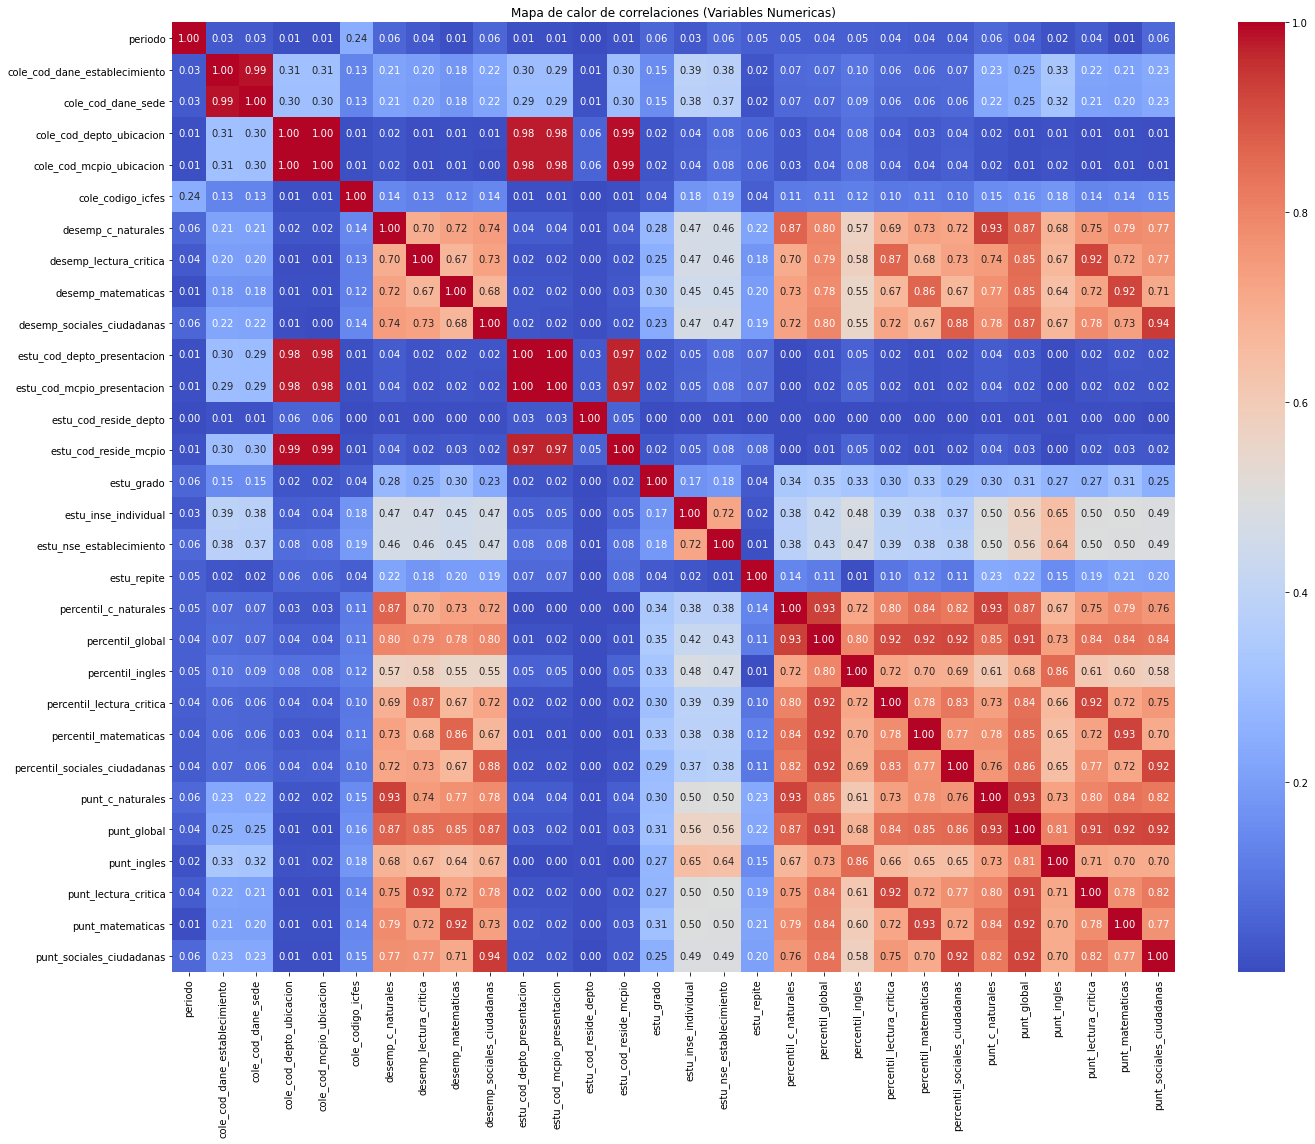

In [14]:
#correlacion de numericas 
def graficar_correlacion_numericas(df, numericas):
    corr = df[numericas].corr().abs()
    plt.figure(figsize=(20,16))
    sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
    plt.title("Mapa de calor de correlaciones (Variables Numericas)")
    plt.tight_layout()
    plt.show()
graficar_correlacion_numericas(df_final, numericas)


In [15]:
def explicar_categoricas(df, categoricas, umbral=15):
    total = len(df)
    for col in categoricas:
        n_unicos = df[col].nunique(dropna=False)
        print(f"\n Variable Categorica: {col}")
        if n_unicos > umbral:
            print(f" Tiene más de {umbral} valores únicos ({n_unicos})")
        else:
            print(f" Tiene {n_unicos} valores únicos")
            valores = df[col].value_counts(dropna=False)
            valores.index = valores.index.astype(str)
            for categoria, cantidad in valores.sort_index().items():
                porcentaje = cantidad / total * 100
                print(f"  {categoria}: {cantidad:,} ({porcentaje:.2f}%)")



explicar_categoricas(df_final, categoricas)


 Variable Categorica: estu_consecutivo
 Tiene más de 15 valores únicos (352248)

 Variable Categorica: estu_estudiante
 Tiene 2 valores únicos
  ESTUDIANTE: 208,539 (59.20%)
  INDIVIDUAL: 143,709 (40.80%)

 Variable Categorica: estu_tipodocumento
 Tiene 15 valores únicos
  CC: 129,532 (36.77%)
  CE: 1,009 (0.29%)
  CR: 1,037 (0.29%)
  DNI: 1 (0.00%)
  NES: 373 (0.11%)
  PC: 43 (0.01%)
  PE: 282 (0.08%)
  PEP: 164 (0.05%)
  PET: 1 (0.00%)
  PPT: 1,423 (0.40%)
  PTP: 6 (0.00%)
  PTT: 1 (0.00%)
  RC: 4 (0.00%)
  TI: 218,361 (61.99%)
  V: 11 (0.00%)

 Variable Categorica: cole_area_ubicacion
 Tiene 3 valores únicos
  RURAL: 32,376 (9.19%)
  URBANO: 176,163 (50.01%)
  nan: 143,709 (40.80%)

 Variable Categorica: cole_bilingue
 Tiene 3 valores únicos
  N: 159,563 (45.30%)
  S: 11,223 (3.19%)
  nan: 181,462 (51.52%)

 Variable Categorica: cole_calendario
 Tiene 4 valores únicos
  A: 171,019 (48.55%)
  B: 34,895 (9.91%)
  OTRO: 2,625 (0.75%)
  nan: 143,709 (40.80%)

 Variable Categorica: cole

In [16]:
def validar_nulos_numericos(df, numericas):
    total = len(df)
    print(f"Total de registros: {total:,}\n")

    resumen = []
    for col in numericas:
        n_nulos = df[col].isna().sum()
        if n_nulos > 0:
            porcentaje = n_nulos / total * 100
            resumen.append((col, n_nulos, porcentaje))

    if resumen:
        print("Variables numéricas con valores nulos:")
        for col, n_nulos, porcentaje in resumen:
            print(f" - {col}: {n_nulos:,} nulos ({porcentaje:.2f}%)")
    else:
        print("Todas las variables numéricas están completas (sin nulos).")
validar_nulos_numericos(df_final, numericas)


Total de registros: 352,248

Variables numéricas con valores nulos:
 - cole_cod_dane_establecimiento: 143,709 nulos (40.80%)
 - cole_cod_dane_sede: 143,709 nulos (40.80%)
 - cole_cod_depto_ubicacion: 143,709 nulos (40.80%)
 - cole_cod_mcpio_ubicacion: 143,709 nulos (40.80%)
 - cole_codigo_icfes: 143,709 nulos (40.80%)
 - estu_cod_depto_presentacion: 3 nulos (0.00%)
 - estu_cod_mcpio_presentacion: 3 nulos (0.00%)
 - estu_cod_reside_depto: 770 nulos (0.22%)
 - estu_cod_reside_mcpio: 770 nulos (0.22%)
 - estu_grado: 142,571 nulos (40.47%)
 - estu_inse_individual: 155,479 nulos (44.14%)
 - estu_nse_establecimiento: 144,146 nulos (40.92%)
 - estu_repite: 20 nulos (0.01%)
 - percentil_global: 1,550 nulos (0.44%)
 - percentil_ingles: 1,550 nulos (0.44%)
 - punt_ingles: 1,675 nulos (0.48%)


In [17]:
valores_unicos_pais = df_final['estu_pais_reside'].unique()
print(valores_unicos_pais)

num_diferentes = (df_final['estu_pais_reside'] != "COLOMBIA").sum()
print(f"Número de registros donde el país es diferente de COLOMBIA: {num_diferentes}")

total = len(df_final)
porcentaje = num_diferentes / total * 100
print(f"Porcentaje de registros diferentes a COLOMBIA: {porcentaje:.2f}%")

['COLOMBIA' 'SUIZA' 'PERÚ' 'CHILE' 'ECUADOR' 'ESTADOS UNIDOS' 'ARGENTINA'
 'VENEZUELA' 'AUSTRIA' 'ESPAÑA' 'BOLIVIA'
 'REPÚBLICA DEMOCRÁTICA DEL CONGO' 'ALEMANIA' 'ITALIA' 'MÉXICO' 'HONDURAS'
 'BRASIL' 'CUBA' 'KENIA' 'PORTUGAL' 'NICARAGUA' 'AFGANISTÁN' 'GUATEMALA'
 'COREA DEL NORTE' 'TERRITORIOS PALESTINOS' 'FRANCIA'
 'REPÚBLICA DOMINICANA' 'PANAMÁ' 'EL SALVADOR' 'DINAMARCA' 'ARGELIA'
 'COSTA RICA' 'CAMERÚN' 'JAPÓN' 'GUINEA ECUATORIAL' 'COREA DEL SUR'
 'TURQUÍA' 'RUSIA' 'TRINIDAD Y TOBAGO' 'TAIWAN' 'INDIA' 'SIRIA' 'CHINA'
 'CANADÁ' 'AUSTRALIA' 'POLONIA' 'BELICE' 'REPÚBLICA CENTROAFRICANA'
 'PARAGUAY' 'REINO UNIDO' 'VANUATU' 'SUECIA' 'NORUEGA' 'CURAZAO'
 'CIUDAD DEL VATICANO' 'ESTADOS FEDERADOS DE MICRONESIA' 'AZERBAIYÁN'
 'ARUBA' 'REPÚBLICA DEL CONGO']
Número de registros donde el país es diferente de COLOMBIA: 2057
Porcentaje de registros diferentes a COLOMBIA: 0.58%


In [18]:
def normalizar_limpiar_variables(df):
    df["estu_nse_individual"] = df["estu_nse_individual"].replace({
        1.0: "NSE1",
        2.0: "NSE2",
        3.0: "NSE3",
        4.0: "NSE4"
    })
    df["cole_sede_principal"] = df["cole_sede_principal"].astype(str).str.strip()
    df["cole_sede_principal"] = df["cole_sede_principal"].replace({
        "P": "S"
    })

    df["estu_horassemanatrabaja"] = df["estu_horassemanatrabaja"].replace({
        0: "0",
        0.0: "0",
        "0 horas": "0"
    })
    df["estu_tieneetnia"] = df["estu_tieneetnia"].replace({
        "Si": "S",
        "No": "N"
    })

    df = df[df["desemp_ingles"].notna()]
    df = df[df["desemp_ingles"].notna()]
    df = df[df["punt_ingles"].notna()]
    df = df[df["estu_nse_establecimiento"].notna()]
    df = df[df["estu_cod_reside_depto"].notna()]
    df = df[df["cole_calendario"].notna()] 
    df = df[df["cole_jornada"].notna()]
    df = df[df["estu_genero"].notna()]
    df = df[df["estu_inse_individual"].notna()]
    df = df[df["estu_fechanacimiento"].notna()]
    df = df[df['estu_pais_reside'] == "COLOMBIA"]
        # usar solamente los estudiantes y no personas que vienen como individuales
    df = df[df['estu_estudiante'] == "ESTUDIANTE"].copy()
    print(" Total Datos con solo estudiantes:", df.shape)
    categoricas_a_imputar = ['estu_tieneetnia', 'cole_bilingue', 'cole_caracter']
    for col in categoricas_a_imputar:
        moda = df[col].mode()[0]  # valor más frecuente
        df[col].fillna(moda, inplace=True)
        print(f"Se imputó {col} con: {moda}")
    
    
    
    return df

df_final = normalizar_limpiar_variables(df_final)

 Total Datos con solo estudiantes: (193650, 87)
Se imputó estu_tieneetnia con: N
Se imputó cole_bilingue con: N
Se imputó cole_caracter con: ACADÉMICO


In [19]:
validar_nulos_numericos(df_final, numericas)
explicar_categoricas(df_final, categoricas)

Total de registros: 193,650

Todas las variables numéricas están completas (sin nulos).

 Variable Categorica: estu_consecutivo
 Tiene más de 15 valores únicos (193650)

 Variable Categorica: estu_estudiante
 Tiene 1 valores únicos
  ESTUDIANTE: 193,650 (100.00%)

 Variable Categorica: estu_tipodocumento
 Tiene 11 valores únicos
  CC: 32,640 (16.86%)
  CE: 209 (0.11%)
  CR: 453 (0.23%)
  NES: 113 (0.06%)
  PC: 8 (0.00%)
  PE: 10 (0.01%)
  PEP: 11 (0.01%)
  PPT: 804 (0.42%)
  RC: 3 (0.00%)
  TI: 159,395 (82.31%)
  V: 4 (0.00%)

 Variable Categorica: cole_area_ubicacion
 Tiene 2 valores únicos
  RURAL: 29,573 (15.27%)
  URBANO: 164,077 (84.73%)

 Variable Categorica: cole_bilingue
 Tiene 2 valores únicos
  N: 183,038 (94.52%)
  S: 10,612 (5.48%)

 Variable Categorica: cole_calendario
 Tiene 3 valores únicos
  A: 158,298 (81.74%)
  B: 32,937 (17.01%)
  OTRO: 2,415 (1.25%)

 Variable Categorica: cole_caracter
 Tiene 4 valores únicos
  ACADÉMICO: 118,172 (61.02%)
  NO APLICA: 2,588 (1.34%)


In [ ]:
#METODO PARA ANALIZAR COLUMNA
# analizar_columna(df_final,"periodo")

# agrupar estrato y NSE  -  fami_estratovivienda - 
#df_final["estu_inse_individual"]

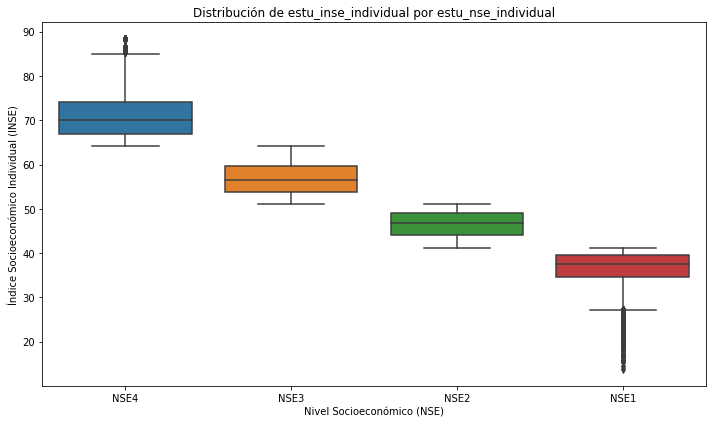

Ambos nulos: 0
estu_nse_individual nulo pero INSE presente: 0
estu_inse_individual nulo pero NSE presente: 0


In [20]:
def graficar_inse_vs_nse(df):
    plt.figure(figsize=(10,6))
    sns.boxplot(x="estu_nse_individual", y="estu_inse_individual", data=df)
    plt.title("Distribución de estu_inse_individual por estu_nse_individual")
    plt.xlabel("Nivel Socioeconómico (NSE)")
    plt.ylabel("Índice Socioeconómico Individual (INSE)")
    plt.tight_layout()
    plt.show()
graficar_inse_vs_nse(df_final)

n_ambos = df_final[df_final["estu_nse_individual"].isna() & df_final["estu_inse_individual"].isna()].shape[0]
n_nse_sin_inse = df_final[df_final["estu_nse_individual"].isna() & df_final["estu_inse_individual"].notna()].shape[0]
n_inse_sin_nse = df_final[df_final["estu_inse_individual"].isna() & df_final["estu_nse_individual"].notna()].shape[0]

print(f"Ambos nulos: {n_ambos:,}")
print(f"estu_nse_individual nulo pero INSE presente: {n_nse_sin_inse:,}")
print(f"estu_inse_individual nulo pero NSE presente: {n_inse_sin_nse:,}")

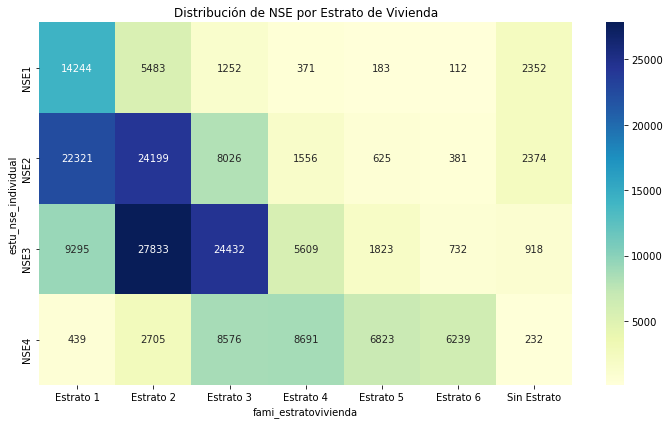

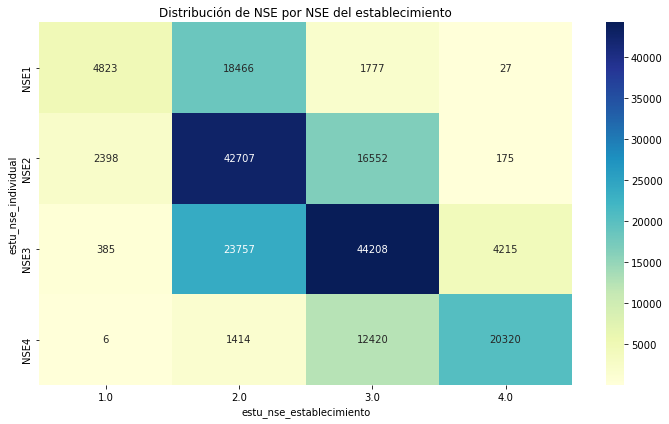

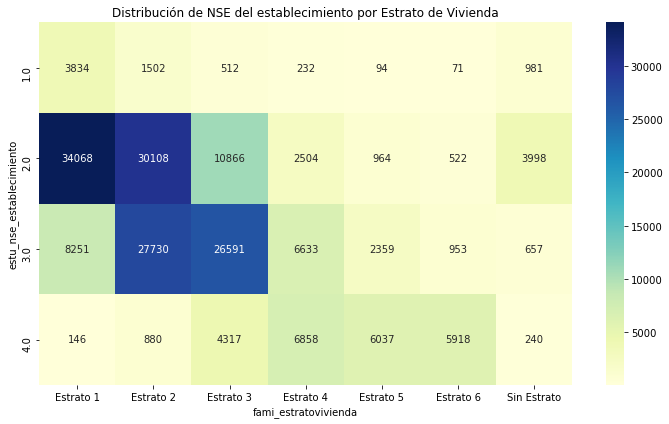

In [21]:


def graficar_heatmap_categoricas(df, fila, columna, titulo=None, cmap="YlGnBu"):
    tabla = pd.crosstab(df[fila], df[columna])
    plt.figure(figsize=(10,6))
    sns.heatmap(tabla, annot=True, fmt="d", cmap=cmap)
    plt.title(titulo or f"Distribución de {fila} vs {columna}")
    plt.xlabel(columna)
    plt.ylabel(fila)
    plt.tight_layout()
    plt.show()
    
graficar_heatmap_categoricas(df_final, "estu_nse_individual", "fami_estratovivienda",
                             titulo="Distribución de NSE por Estrato de Vivienda")

graficar_heatmap_categoricas(df_final, "estu_nse_individual", "estu_nse_establecimiento",
                             titulo="Distribución de NSE por NSE del establecimiento")

graficar_heatmap_categoricas(df_final, "estu_nse_establecimiento", "fami_estratovivienda",
                             titulo="Distribución de NSE del establecimiento por Estrato de Vivienda")




# DETALLES

hay una relación entre NES del establecimiento y el NSE del estudiante
por lo que se va a retirar una de estas variables, adicional, no es muy notorio, pero también hay relacion entre en nes y el estrato del vivienda familiar

# Identificar variables para el caso 

## si es categoríca con 2 valores y uno de ellos es menor al 1% se descarta la variable 
## si los nan son menos de 2% se retiran esos valores 

## Adicional se retiran las variables de desempeño ya que son correlacionadas con el puntaje de cada area

In [22]:
variables_por_correlacion = [
    "estu_pilopaga",
    "cole_cod_dane_sede",
    "cole_cod_depto_ubicacion",
    "cole_cod_mcpio_ubicacion",
    "estu_cod_reside_mcpio",
    "estu_nse_establecimiento",
    "fami_estratovivienda",
    "percentil_c_naturales",
    "percentil_ingles",
    "percentil_lectura_critica",
    "percentil_global",
    "percentil_matematicas",
    "percentil_sociales_ciudadanas"
    
]

variables_no_necesarias = [
    "estu_pilopaga",
    "estu_estudiante",#Se retira porque previamente se seleccianaron solo estudiantes invididuales
    "estu_repite",
    "estu_consecutivo",
    "cole_cod_dane_establecimiento",
    "cole_codigo_icfes",
    "cole_nombre_establecimiento",
    "cole_nombre_sede",
    "estu_cod_reside_depto",
    "fami_trabajolabormadre",
    "fami_trabajolaborpadre",
    "estu_cod_depto_presentacion",
    "estu_agregado",
    "estu_grado",
    "estu_etnia",
    "estu_nacionalidad",
    "estu_pais_reside",
    "estu_depto_presentacion", # es posible que haya presentando en otro departamento
    "estu_mcpio_presentacion", # es posible que haya presentando en otro municipio
    "estu_cod_mcpio_presentacion" ,
    "cole_sede_principal", #no hay relevancia en los valores de estas variables como se vio en la descripccion
    "estu_privado_libertad", #tiene 2 posibilidades y una de ella es un % muy pequeño en relación al otro.
    "estu_tipodocumento", #No se considera relevante
    "estu_generacione", #solo es un valor
    "estu_inse_individual",#tenemos mas del 40% de nulos los mismos que NSE  
    "estu_discapacidad", # son 2 variabes tiene o no tiene y no tiene corresponde  a un % menor a 1% 
    "desemp_lectura_critica",
    "desemp_matematicas",
    "desemp_sociales_ciudadanas",
    "desemp_ingles",
    "desemp_c_naturales",
    "estu_pais_reside"
]

In [23]:

variables_a_eliminar = list(set(variables_por_correlacion + variables_no_necesarias))

df_limpio_p1 = df_final.drop(columns=variables_a_eliminar, errors="ignore")
numericas, categoricas = extraer_variables_tipo(df_limpio_p1)

validar_nulos_numericos(df_limpio_p1, numericas)
explicar_categoricas(df_limpio_p1, categoricas)

#Columnas Generales 
#estu_depto_reside - estu_fechanacimiento - estu_genero - estu_mcpio_reside - estu_nse_individual -estu_tieneetnia
#periodo - punt_c_naturales - punt_global - punt_ingles - punt_lectura_critica - punt_matematicas - punt_sociales_ciudadana
#Columnas de colegio
#cole_area_ubicacion - cole_bilingue - cole_calendario - cole_caracter - cole_depto_ubicacion - cole_genero - cole_jornada - cole_mcpio_ubicacion - cole_naturaleza
# Columnas familia
#fami_comecarnepescadohuevo - fami_comecerealfrutoslegumbre - fami_comelechederivados - fami_cuartoshogar - fami_educacionmadre - fami_educacionpadre - fami_numlibros - fami_personashogar - fami_situacioneconomica - fami_tieneautomovil - fami_tienecomputador - fami_tieneconsolavideojuegos - fami_tienehornomicroogas - fami_tieneinternet - fami_tienelavadora - fami_tienemotocicleta - fami_tieneserviciotv
# otros 
# estu_dedicacioninternet,estu_dedicacionlecturadiaria, estu_horassemanatrabaja - estu_tiporemuneracion


variables numéricas (7):
 - periodo - punt_c_naturales - punt_global - punt_ingles - punt_lectura_critica - punt_matematicas - punt_sociales_ciudadanas

variables categóricas (37):
 - cole_area_ubicacion - cole_bilingue - cole_calendario - cole_caracter - cole_depto_ubicacion - cole_genero - cole_jornada - cole_mcpio_ubicacion - cole_naturaleza - estu_dedicacioninternet - estu_dedicacionlecturadiaria - estu_depto_reside - estu_fechanacimiento - estu_genero - estu_horassemanatrabaja - estu_mcpio_reside - estu_nse_individual - estu_tieneetnia - estu_tiporemuneracion - fami_comecarnepescadohuevo - fami_comecerealfrutoslegumbre - fami_comelechederivados - fami_cuartoshogar - fami_educacionmadre - fami_educacionpadre - fami_numlibros - fami_personashogar - fami_situacioneconomica - fami_tieneautomovil - fami_tienecomputador - fami_tieneconsolavideojuegos - fami_tienehornomicroogas - fami_tieneinternet - fami_tienelavadora - fami_tienemotocicleta - fami_tieneserviciotv - año
Total de registr

## Fase 2: identificar características y relaciones en las variables

En esta fase realizarás análisis descriptivo para identificar posibles patrones o relaciones entre las variables de interés para la problemática planteada. Además, expondrás estadísticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegirás el segmento de los datos sobre el cual profundizarás con tu análisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable sociodemográfica relevante en el contexto del problema.
* Utilizar librerías especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de interés. Los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser útiles.
* Utilizar el método `groupby` de `pandas`, en conjunto con métodos de visualización, puede proveer evidencia del impacto de las variables sociodemográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:

* ¿Hay patrones de interés en las distribuciones de las variables o en las relaciones entre ellas?
* ¿Consideras que existe algún impacto significativo de variables sociodemográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables harías un análisis más profundo?

In [24]:
def graficar_violin_desempeno_por_categoria(df, categoria, desempeno, titulo=None, ordenar=True):
    plt.figure(figsize=(10,6))
    if ordenar:
        orden = df.groupby(categoria)[desempeno].median().sort_values().index
    else:
        orden = None

    sns.violinplot(x=categoria, y=desempeno, data=df, order=orden, palette="Set2", inner="box")
    plt.title(titulo or f"Distribución de {desempeno} por {categoria}")
    plt.xlabel(categoria)
    plt.ylabel(desempeno)
    plt.tight_layout()
    plt.show()
def graficarTest():

    graficar_violin_desempeno_por_categoria(df_final, "estu_dedicacionlecturadiaria", "punt_global",
                                            titulo="Distribución del puntaje global por dedicación a lectura")

    graficar_violin_desempeno_por_categoria(df_final, "estu_genero", "punt_global",
                                            titulo="Distribución del puntaje global por genero")

    graficar_violin_desempeno_por_categoria(df_final, "cole_calendario", "punt_global",
                                            titulo="Distribución del puntaje global por Calendario")

    graficar_violin_desempeno_por_categoria(df_final, "cole_naturaleza", "punt_global",
                                            titulo="Distribución del puntaje global por Naturaleza Colegio")

    graficar_violin_desempeno_por_categoria(df_final, "cole_jornada", "punt_global",
                                            titulo="Distribución del puntaje global por Jornada Colegio")

    graficar_violin_desempeno_por_categoria(df_final, "estu_tieneetnia", "punt_global",
                                            titulo="Distribución del puntaje global por estudiante con Etnia")


#graficarTest()


In [25]:

df_limpio_p1['estu_fechanacimiento'] = pd.to_datetime(
    df_limpio_p1['estu_fechanacimiento'], errors='coerce', dayfirst=True
)

df_limpio_p1['año'] = pd.to_numeric(df_limpio_p1['año'], errors='coerce').astype('Int64')


df_limpio_p1['edad'] = df_limpio_p1['año'] - df_limpio_p1['estu_fechanacimiento'].dt.year

print(df_limpio_p1[['estu_fechanacimiento','año','edad']].head())

numericas, categoricas = extraer_variables_tipo(df_limpio_p1)

   estu_fechanacimiento   año  edad
0            2000-07-25  2018  18.0
5            2001-12-06  2018  17.0
6            2000-11-04  2018  18.0
7            1999-07-01  2018  19.0
11           2001-05-08  2018  17.0
variables numéricas (9):
 - periodo - punt_c_naturales - punt_global - punt_ingles - punt_lectura_critica - punt_matematicas - punt_sociales_ciudadanas - año - edad

variables categóricas (35):
 - cole_area_ubicacion - cole_bilingue - cole_calendario - cole_caracter - cole_depto_ubicacion - cole_genero - cole_jornada - cole_mcpio_ubicacion - cole_naturaleza - estu_dedicacioninternet - estu_dedicacionlecturadiaria - estu_depto_reside - estu_genero - estu_horassemanatrabaja - estu_mcpio_reside - estu_nse_individual - estu_tieneetnia - estu_tiporemuneracion - fami_comecarnepescadohuevo - fami_comecerealfrutoslegumbre - fami_comelechederivados - fami_cuartoshogar - fami_educacionmadre - fami_educacionpadre - fami_numlibros - fami_personashogar - fami_situacioneconomica - fami_t

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64

def graficar_violin_html(df, categorias, desempeno, ordenar=True, por_fila=2):
    html = "<div style='display:flex; flex-wrap:wrap;'>"

    for categoria in categorias:
        plt.figure(figsize=(6,5))
        orden = df.groupby(categoria)[desempeno].median().sort_values().index if ordenar else None
        sns.violinplot(x=categoria, y=desempeno, data=df, order=orden, palette="Set2", inner="box")
        plt.title(f"{desempeno} por {categoria}")
        plt.xlabel(categoria)
        plt.ylabel(desempeno)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        img_base64 = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()

        html += f"<div style='flex: 1 0 {100//por_fila}%; padding:10px;'><img src='data:image/png;base64,{img_base64}' style='width:100%;'></div>"

    html += "</div>"
    display(HTML(html))



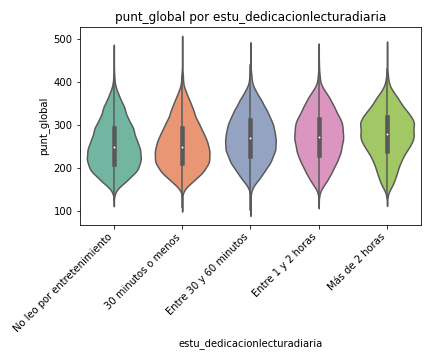
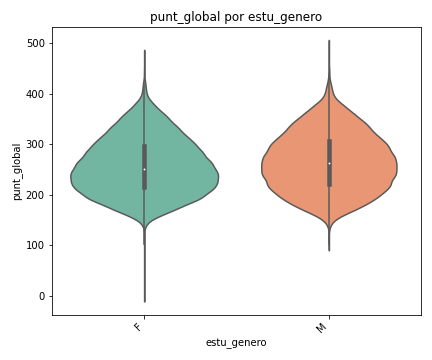
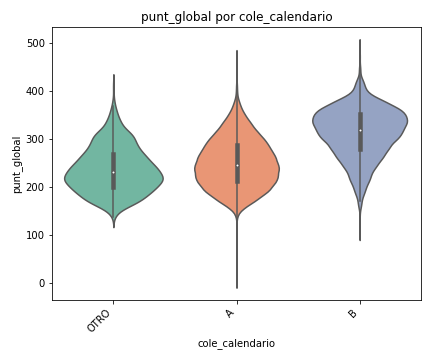
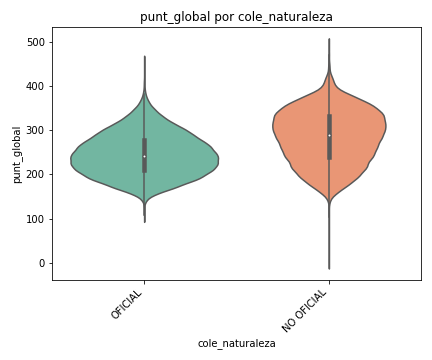
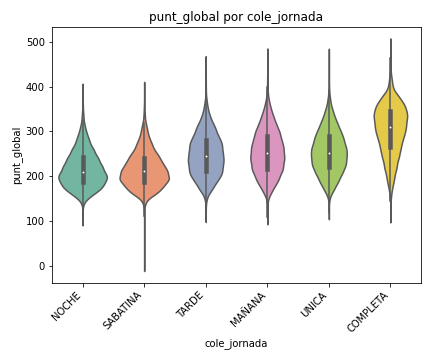
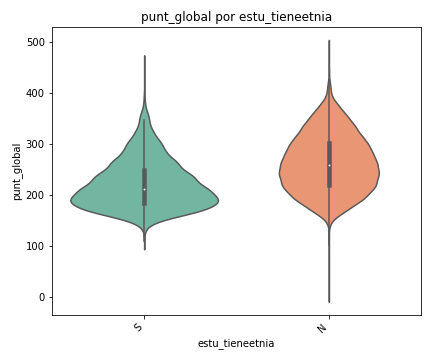

In [27]:
categorias = [
    "estu_dedicacionlecturadiaria", "estu_genero", "cole_calendario",
    "cole_naturaleza", "cole_jornada", "estu_tieneetnia",
]

graficar_violin_html(df_final, categorias, "punt_global", por_fila=2)


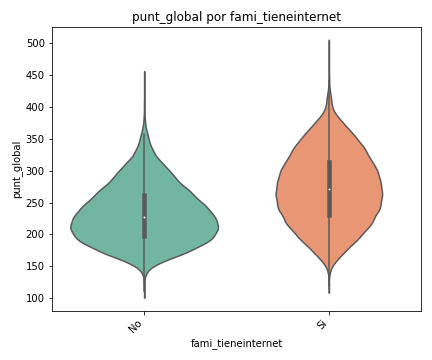
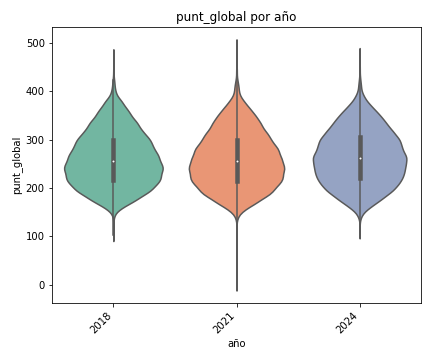
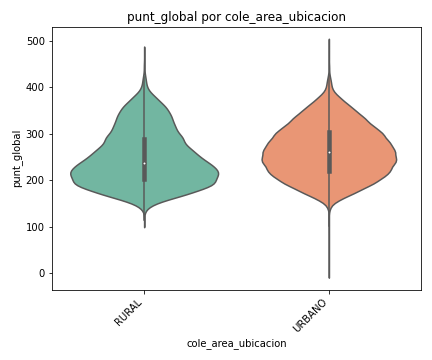
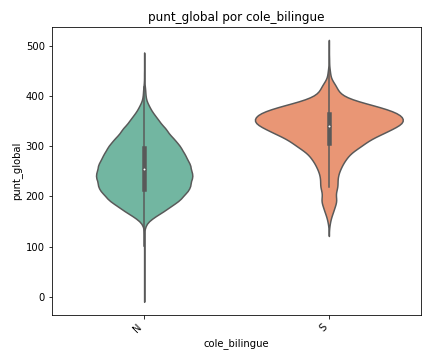
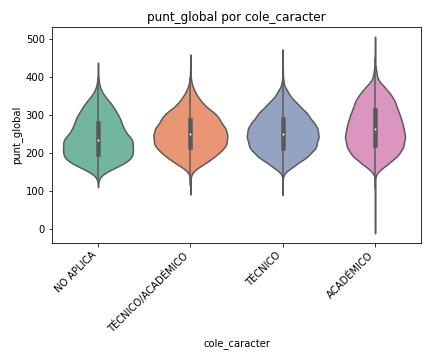
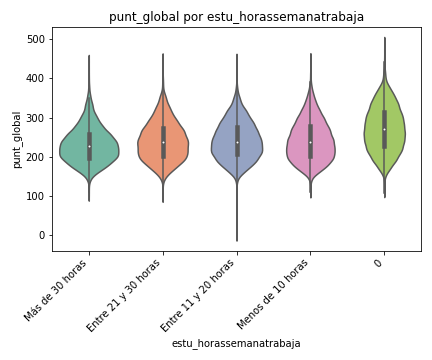

In [28]:
 categorias = [
     "fami_tieneinternet", "año",
    "cole_area_ubicacion", "cole_bilingue",
    "cole_caracter", "estu_horassemanatrabaja"
]
graficar_violin_html(df_final, categorias, "punt_global", por_fila=2)

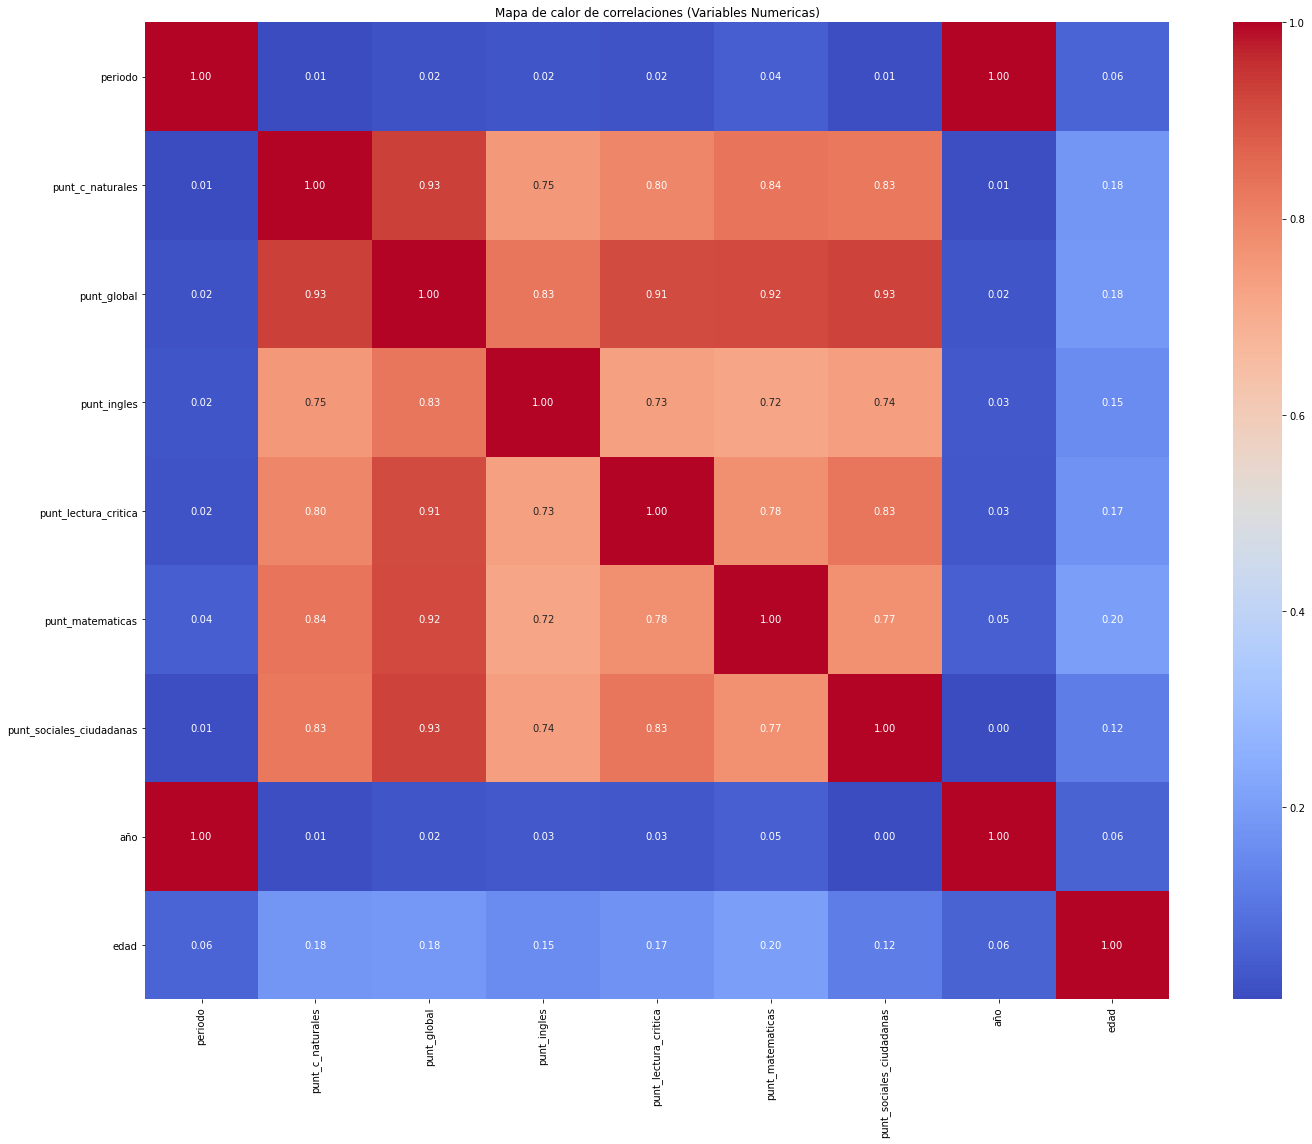

In [29]:
graficar_correlacion_numericas(df_limpio_p1, numericas)

Correlaciones con punt_global:
punt_global                 1.000000
punt_c_naturales            0.932900
punt_sociales_ciudadanas    0.927427
punt_matematicas            0.916822
punt_lectura_critica        0.914128
punt_ingles                 0.832418
año                         0.024012
periodo                     0.018706
edad                       -0.183628
Name: punt_global, dtype: float64


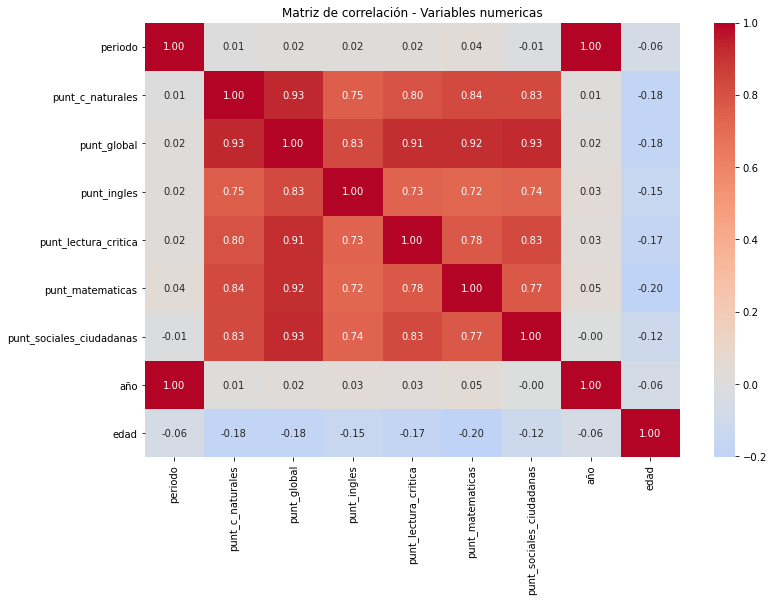

In [30]:



num_df = df_limpio_p1.select_dtypes(include=['int64','float64','Int64'])

corr = num_df.corr()

if "punt_global" in corr.columns:
    print("Correlaciones con punt_global:")
    print(corr['punt_global'].sort_values(ascending=False).head(15))

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Matriz de correlación - Variables numericas")
plt.show()

In [31]:
print(df_limpio_p1.columns)

Index(['periodo', 'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario',
       'cole_caracter', 'cole_depto_ubicacion', 'cole_genero', 'cole_jornada',
       'cole_mcpio_ubicacion', 'cole_naturaleza', 'estu_dedicacioninternet',
       'estu_dedicacionlecturadiaria', 'estu_depto_reside',
       'estu_fechanacimiento', 'estu_genero', 'estu_horassemanatrabaja',
       'estu_mcpio_reside', 'estu_nse_individual', 'estu_tieneetnia',
       'estu_tiporemuneracion', 'fami_comecarnepescadohuevo',
       'fami_comecerealfrutoslegumbre', 'fami_comelechederivados',
       'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre',
       'fami_numlibros', 'fami_personashogar', 'fami_situacioneconomica',
       'fami_tieneautomovil', 'fami_tienecomputador',
       'fami_tieneconsolavideojuegos', 'fami_tienehornomicroogas',
       'fami_tieneinternet', 'fami_tienelavadora', 'fami_tienemotocicleta',
       'fami_tieneserviciotv', 'punt_c_naturales', 'punt_global',
       'punt_ingles', 'p

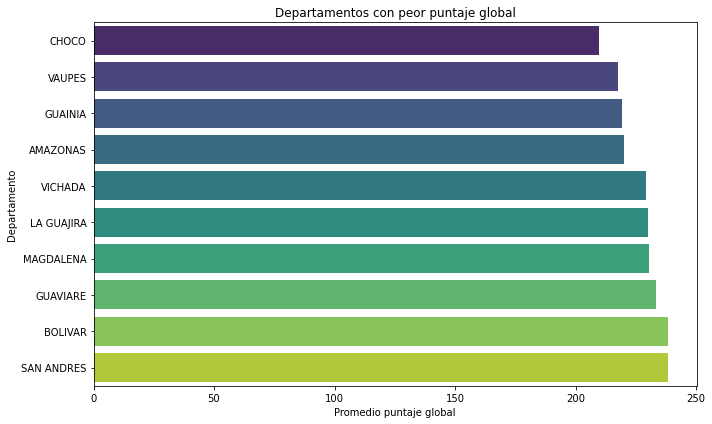

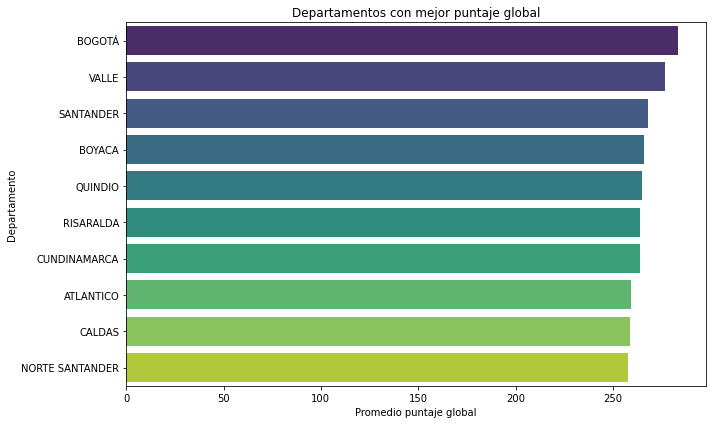

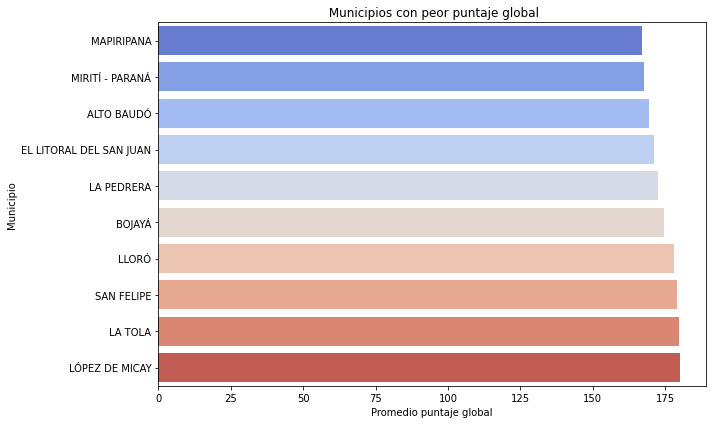

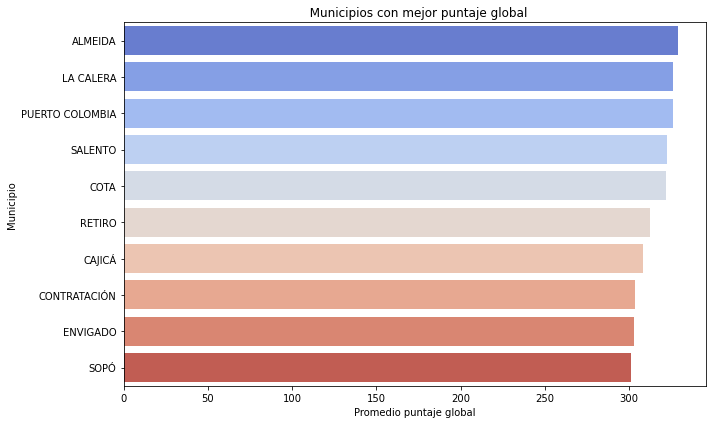

In [32]:
df_municipios = df_final.groupby("cole_mcpio_ubicacion")["punt_global"].agg(["count", "mean"]).reset_index()
df_municipios.columns = ["municipio", "n_estudiantes", "prom_puntaje"]

# Peores 10 municipios
df_municipios = df_final.groupby("cole_mcpio_ubicacion")["punt_global"].agg(["count", "mean"]).reset_index()
df_municipios.columns = ["municipio", "n_estudiantes", "prom_puntaje"]
peores_municipios = df_municipios.sort_values("prom_puntaje").head(10)

mejores_municipios = df_municipios.sort_values("prom_puntaje", ascending=False).head(10)
df_deptos = df_final.groupby("estu_depto_reside")["punt_global"].agg(["count", "mean"]).reset_index()
df_deptos.columns = ["departamento", "n_estudiantes", "prom_puntaje"]
peores_deptos = df_deptos.sort_values("prom_puntaje").head(10)
mejores_deptos = df_deptos.sort_values("prom_puntaje", ascending=False).head(10)

def graficar_barplot_municipios(df, titulo):
    plt.figure(figsize=(10,6))
    sns.barplot(x="prom_puntaje", y="municipio", data=df, palette="coolwarm")
    plt.title(titulo)
    plt.xlabel("Promedio puntaje global")
    plt.ylabel("Municipio")
    plt.tight_layout()
    plt.show()

def graficar_barplot_deptos(df, titulo):
    plt.figure(figsize=(10,6))
    sns.barplot(x="prom_puntaje", y="departamento", data=df, palette="viridis")
    plt.title(titulo)
    plt.xlabel("Promedio puntaje global")
    plt.ylabel("Departamento")
    plt.tight_layout()
    plt.show()

graficar_barplot_deptos(peores_deptos, "Departamentos con peor puntaje global")
graficar_barplot_deptos(mejores_deptos, "Departamentos con mejor puntaje global")


graficar_barplot_municipios(peores_municipios, " Municipios con peor puntaje global")
graficar_barplot_municipios(mejores_municipios, "  Municipios con mejor puntaje global")




In [33]:

# Columnas generales
columnas_generales = [
    'estu_depto_reside', 'estu_fechanacimiento', 'estu_genero',
    'estu_mcpio_reside', 'estu_nse_individual', 'estu_tieneetnia',
    'periodo','punt_c_naturales', 'punt_global', 'punt_ingles',
    'punt_lectura_critica', 'punt_matematicas', 'punt_sociales_ciudadanas',"edad"
]

# Columnas colegio
columnas_colegio = [
    'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario', 'cole_caracter',
    'cole_depto_ubicacion', 'cole_genero', 'cole_jornada', 'cole_mcpio_ubicacion',
    'cole_naturaleza'
]

# Columnas familia
columnas_familia = [
    'fami_comecarnepescadohuevo', 'fami_comecerealfrutoslegumbre', 'fami_comelechederivados',
    'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre', 'fami_numlibros',
    'fami_personashogar', 'fami_situacioneconomica', 'fami_tieneautomovil', 'fami_tienecomputador',
    'fami_tieneconsolavideojuegos', 'fami_tienehornomicroogas', 'fami_tieneinternet',
    'fami_tienelavadora', 'fami_tienemotocicleta', 'fami_tieneserviciotv'
]

columnas_familia_1 = [
    'fami_comecarnepescadohuevo', 'fami_comecerealfrutoslegumbre', 'fami_comelechederivados',
    'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre', 'fami_numlibros',
    'fami_personashogar', 'fami_situacioneconomica', 'fami_tieneautomovil', 'fami_tienecomputador',
    'fami_tieneconsolavideojuegos', 'fami_tienehornomicroogas', 'fami_tieneinternet',
    'fami_tienelavadora', 'fami_tienemotocicleta', 'fami_tieneserviciotv','estu_nse_individual'
]
# Columnas otros
columnas_otros = [
    'estu_dedicacioninternet', 'estu_dedicacionlecturadiaria',
    'estu_horassemanatrabaja', 'estu_tiporemuneracion'
]

# Crear DataFrames
df_estudiante = df_limpio_p1[columnas_generales]
df_solo_familia=df_limpio_p1[columnas_familia_1]
df_colegio = df_limpio_p1[columnas_generales + columnas_colegio]

df_familia = df_limpio_p1[columnas_generales + columnas_familia]

df_otros = df_limpio_p1[columnas_generales + columnas_otros]

In [34]:
df_colegio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193650 entries, 0 to 352247
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   estu_depto_reside         193650 non-null  object        
 1   estu_fechanacimiento      192169 non-null  datetime64[ns]
 2   estu_genero               193650 non-null  object        
 3   estu_mcpio_reside         193650 non-null  object        
 4   estu_nse_individual       193650 non-null  object        
 5   estu_tieneetnia           193650 non-null  object        
 6   periodo                   193650 non-null  int64         
 7   punt_c_naturales          193650 non-null  int64         
 8   punt_global               193650 non-null  int64         
 9   punt_ingles               193650 non-null  float64       
 10  punt_lectura_critica      193650 non-null  int64         
 11  punt_matematicas          193650 non-null  int64         
 12  pu

In [35]:
numericas, categoricas = extraer_variables_tipo(df_colegio)

variables numéricas (8):
 - periodo - punt_c_naturales - punt_global - punt_ingles - punt_lectura_critica - punt_matematicas - punt_sociales_ciudadanas - edad

variables categóricas (14):
 - estu_depto_reside - estu_genero - estu_mcpio_reside - estu_nse_individual - estu_tieneetnia - cole_area_ubicacion - cole_bilingue - cole_calendario - cole_caracter - cole_depto_ubicacion - cole_genero - cole_jornada - cole_mcpio_ubicacion - cole_naturaleza


# A continuación se realiza un analisis comparativo entre las variables de los diferentes DF que se enunciaron anteriormente junto con la variable de desempeño(puntaje global)

variables numéricas (8):
 - periodo - punt_c_naturales - punt_global - punt_ingles - punt_lectura_critica - punt_matematicas - punt_sociales_ciudadanas - edad

variables categóricas (14):
 - estu_depto_reside - estu_genero - estu_mcpio_reside - estu_nse_individual - estu_tieneetnia - cole_area_ubicacion - cole_bilingue - cole_calendario - cole_caracter - cole_depto_ubicacion - cole_genero - cole_jornada - cole_mcpio_ubicacion - cole_naturaleza
Análisis de estu_depto_reside:
                   count  median        mean        std
estu_depto_reside                                      
BOGOTÁ             34182   283.0  283.426365  56.626356
VALLE              27817   277.0  276.820613  55.512936
SANTANDER           7943   265.0  268.131185  55.254239
BOYACA              4713   265.0  266.102695  47.924225
EXTRANJERO             5   262.0  256.800000  22.331592
CUNDINAMARCA       12471   261.0  263.680619  51.448992
RISARALDA           3434   260.0  263.801980  53.236704
QUINDIO          

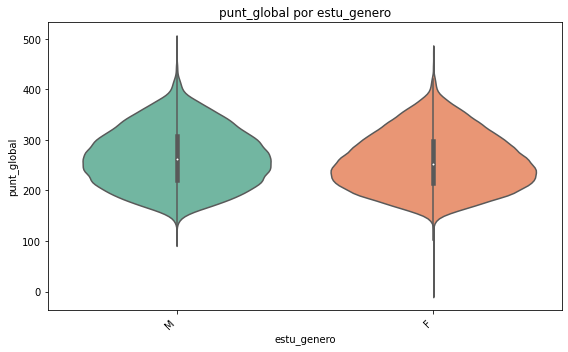

Análisis de estu_mcpio_reside:
                   count  median        mean        std
estu_mcpio_reside                                      
ALMEIDA                1   329.0  329.000000        NaN
LA CALERA            183   317.0  303.420765  56.761725
CAJICÁ               571   311.0  304.493870  51.935195
ENVIGADO            1225   310.0  302.909388  52.687302
BERBEO                 7   307.0  278.142857  55.675933
CHÍA                1185   303.0  297.156118  57.226657
SAN JOAQUÍN            7   302.0  287.285714  36.252422
TUTA                  23   302.0  288.260870  40.452236
COTA                 204   301.0  297.955882  53.619927
SOPÓ                 131   300.0  289.381679  57.823133
Análisis de estu_nse_individual:
                     count  median        mean        std
estu_nse_individual                                      
NSE4                 34160     325  319.609456  48.840954
NSE3                 72565     265  265.477117  49.548251
NSE2                 61832     2

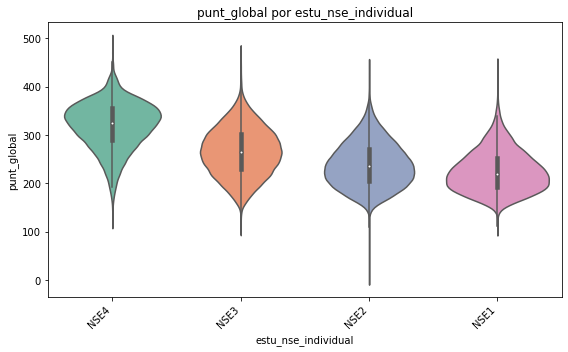

Análisis de estu_tieneetnia:
                  count  median        mean        std
estu_tieneetnia                                       
N                185792     259  262.870603  56.121566
S                  7858     212  221.453678  47.373193


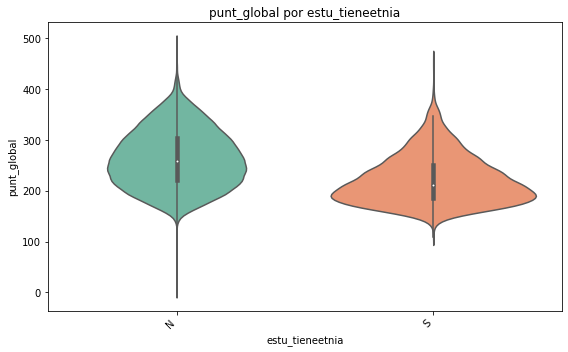

Análisis de cole_area_ubicacion:
                      count  median        mean        std
cole_area_ubicacion                                       
URBANO               164077     260  263.470596  55.484269
RURAL                 29573     237  248.536604  59.599071


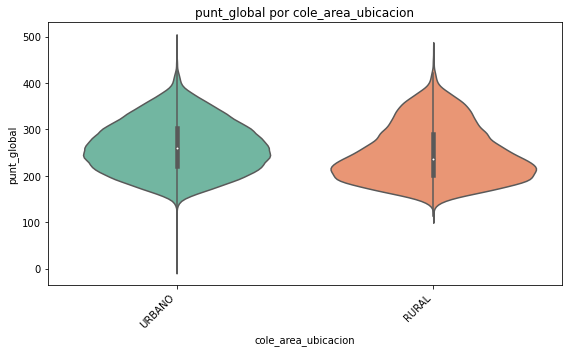

Análisis de cole_bilingue:
                count  median        mean        std
cole_bilingue                                       
S               10612     341  329.363551  52.934720
N              183038     254  257.237470  54.004508


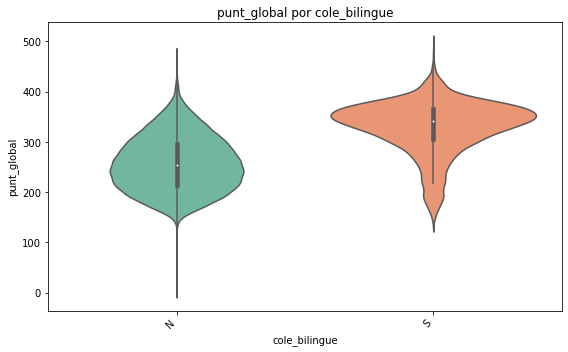

Análisis de cole_calendario:
                  count  median        mean        std
cole_calendario                                       
B                 32937     320  313.745362  51.881602
A                158298     247  250.621145  50.988958
OTRO               2415     232  237.176398  47.659595


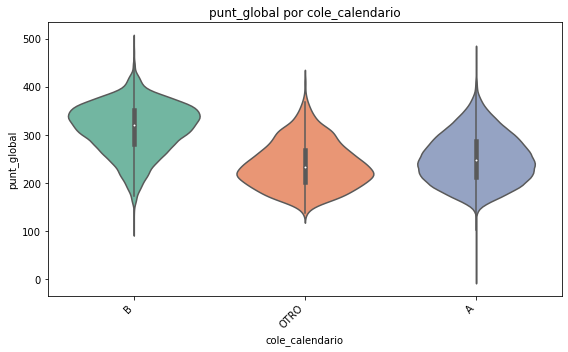

Análisis de cole_caracter:
                    count  median        mean        std
cole_caracter                                           
ACADÉMICO          118172     263  266.900146  59.414846
TÉCNICO             20581     251  253.022934  50.311518
TÉCNICO/ACADÉMICO   52309     250  252.519605  49.646502
NO APLICA            2588     234  240.649536  53.153900


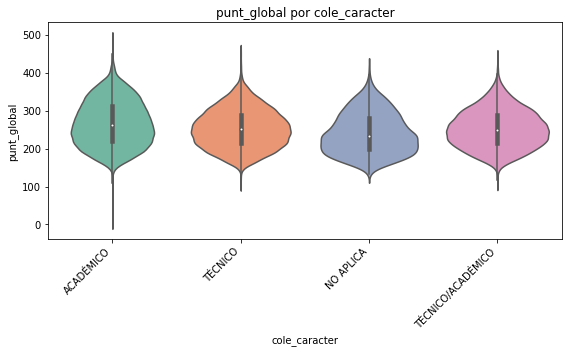

Análisis de cole_depto_ubicacion:
                      count  median        mean        std
cole_depto_ubicacion                                      
BOGOTÁ                20774     282  282.215943  56.471174
BOGOTA                12556     277  279.574068  57.072024
VALLE                 27824     277  276.801215  55.517263
CUNDINAMARCA          13449     267  269.785114  53.490105
BOYACA                 4682     265  266.251602  47.834159
SANTANDER              8084     264  267.461405  55.343095
QUINDIO                1766     260  264.933182  54.449166
RISARALDA              3491     260  263.962475  53.154061
NORTE SANTANDER        4820     256  257.830083  49.788892
NARIÑO                 6027     255  257.434876  55.065804
Análisis de cole_genero:
              count  median        mean        std
cole_genero                                       
MASCULINO      2553     328  320.308656  54.240852
FEMENINO       6195     304  300.270379  49.863686
MIXTO        184902     255  

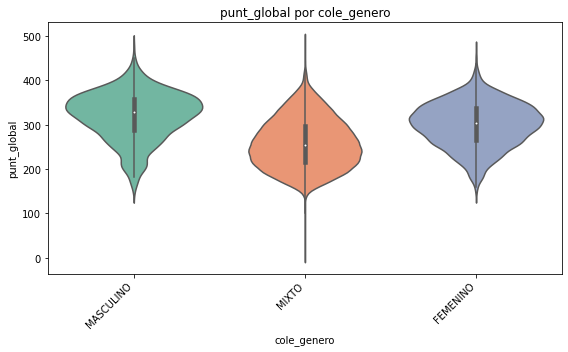

Análisis de cole_jornada:
              count  median        mean        std
cole_jornada                                      
COMPLETA      45644     310  303.333976  55.654867
UNICA         32864     253  255.221184  48.274630
MAÑANA        76439     252  254.659245  50.168578
TARDE         16026     246  248.368589  46.788481
SABATINA      12916     211  215.945494  39.534921
NOCHE          9761     210  216.275791  40.307282


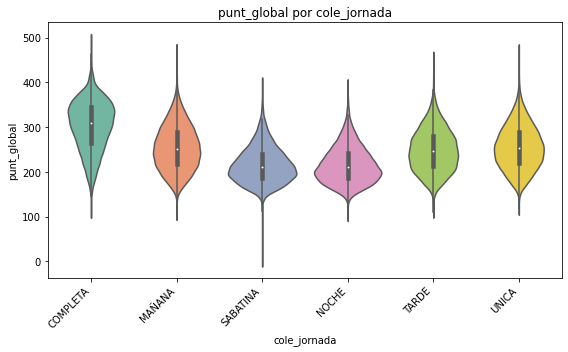

Análisis de cole_mcpio_ubicacion:
                      count  median        mean        std
cole_mcpio_ubicacion                                      
LA CALERA               454   335.0  325.922907  47.768673
PUERTO COLOMBIA        1159   335.0  325.915444  49.221274
SALENTO                 122   331.0  322.819672  50.755615
ALMEIDA                   1   329.0  329.000000        NaN
COTA                    528   329.0  321.767045  47.960815
RETIRO                  177   326.0  312.638418  57.909650
CAJICÁ                  668   315.0  308.327844  50.270590
ENVIGADO               1180   309.5  302.732203  52.861297
CONTRATACIÓN              9   307.0  303.777778  35.017059
SOPÓ                    157   307.0  301.216561  60.317676
Análisis de cole_naturaleza:
                  count  median       mean        std
cole_naturaleza                                      
NO OFICIAL        77530     288  284.99724  59.982341
OFICIAL          116120     242  245.29454  47.637784


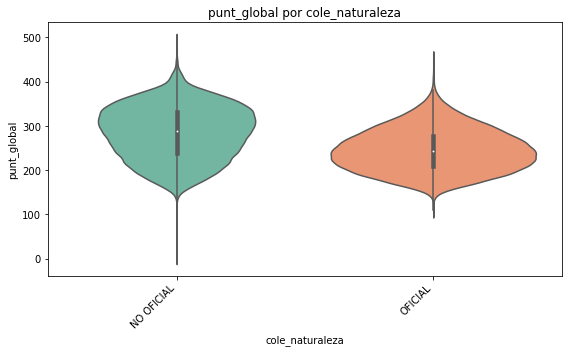

Correlación de variables numéricas con punt_global
                          punt_global  punt_global
periodo                      0.018706     0.018706
punt_c_naturales             0.932900     0.932900
punt_ingles                  0.832418     0.832418
punt_lectura_critica         0.914128     0.914128
punt_matematicas             0.916822     0.916822
punt_sociales_ciudadanas     0.927427     0.927427
edad                        -0.183628    -0.183628


In [36]:


# Función para analizar variables categóricas
def analizar_categoricas(df, categorias, desempeno, max_niveles_grafico=10):
    for cat in categorias:
        print(f"Análisis de {cat}:")
        resumen = df.groupby(cat)[desempeno].agg(['count','median','mean','std']).sort_values('median', ascending=False)
        print(resumen.head(10))  
        n_niveles = df[cat].nunique(dropna=True)
        if n_niveles <= max_niveles_grafico:
            plt.figure(figsize=(8,5))
            sns.violinplot(x=cat, y=desempeno, data=df, palette="Set2", inner="box")
            plt.xticks(rotation=45, ha='right')
            plt.title(f"{desempeno} por {cat}")
            plt.tight_layout()
            plt.show()


def analizar_numericas(df, numericas, desempeno):
    for num in numericas + [desempeno]:
        df[num] = pd.to_numeric(df[num], errors='coerce')
    
    corr = df[numericas + [desempeno]].corr()[desempeno].drop(desempeno)
    print("Correlación de variables numéricas con", desempeno)
    print(corr)
    

meta = "punt_global"
numericas, categoricas = extraer_variables_tipo(df_colegio)
analizar_categoricas(df_colegio, categoricas, meta)
analizar_numericas(df_colegio, numericas, meta)

variables numéricas (8):
 - periodo - punt_c_naturales - punt_global - punt_ingles - punt_lectura_critica - punt_matematicas - punt_sociales_ciudadanas - edad

variables categóricas (22):
 - estu_depto_reside - estu_genero - estu_mcpio_reside - estu_nse_individual - estu_tieneetnia - fami_comecarnepescadohuevo - fami_comecerealfrutoslegumbre - fami_comelechederivados - fami_cuartoshogar - fami_educacionmadre - fami_educacionpadre - fami_numlibros - fami_personashogar - fami_situacioneconomica - fami_tieneautomovil - fami_tienecomputador - fami_tieneconsolavideojuegos - fami_tienehornomicroogas - fami_tieneinternet - fami_tienelavadora - fami_tienemotocicleta - fami_tieneserviciotv
Análisis de estu_depto_reside:
                   count  median        mean        std
estu_depto_reside                                      
BOGOTÁ             34182   283.0  283.426365  56.626356
VALLE              27817   277.0  276.820613  55.512936
SANTANDER           7943   265.0  268.131185  55.254239

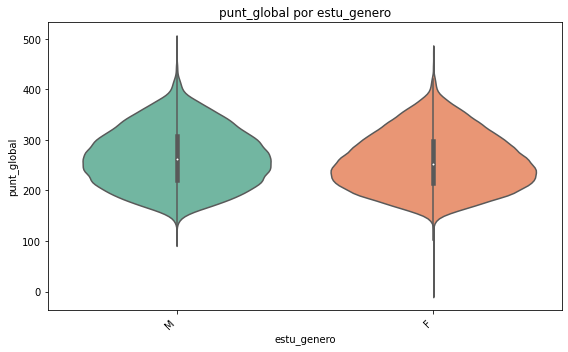

Análisis de estu_mcpio_reside:
                   count  median        mean        std
estu_mcpio_reside                                      
ALMEIDA                1   329.0  329.000000        NaN
LA CALERA            183   317.0  303.420765  56.761725
CAJICÁ               571   311.0  304.493870  51.935195
ENVIGADO            1225   310.0  302.909388  52.687302
BERBEO                 7   307.0  278.142857  55.675933
CHÍA                1185   303.0  297.156118  57.226657
SAN JOAQUÍN            7   302.0  287.285714  36.252422
TUTA                  23   302.0  288.260870  40.452236
COTA                 204   301.0  297.955882  53.619927
SOPÓ                 131   300.0  289.381679  57.823133
Análisis de estu_nse_individual:
                     count  median        mean        std
estu_nse_individual                                      
NSE4                 34160     325  319.609456  48.840954
NSE3                 72565     265  265.477117  49.548251
NSE2                 61832     2

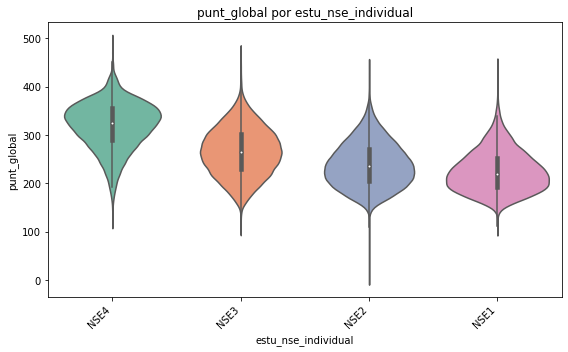

Análisis de estu_tieneetnia:
                  count  median        mean        std
estu_tieneetnia                                       
N                185792     259  262.870603  56.121566
S                  7858     212  221.453678  47.373193


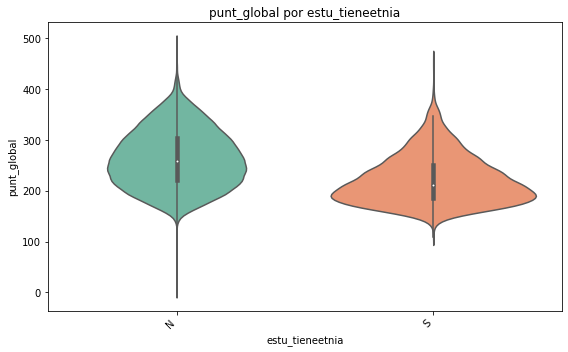

Análisis de fami_comecarnepescadohuevo:
                              count  median        mean        std
fami_comecarnepescadohuevo                                        
Todos o casi todos los días   83469     278  278.498461  58.785495
3 a 5 veces por semana        53600     254  256.884478  50.884034
1 o 2 veces por semana        41916     238  241.771161  48.211852
Nunca o rara vez comemos eso   9126     224  231.636314  50.722953


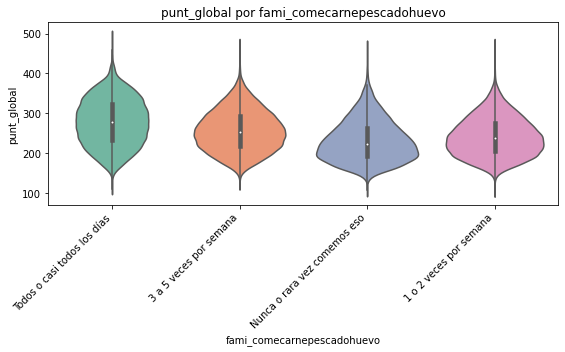

Análisis de fami_comecerealfrutoslegumbre:
                               count  median        mean        std
fami_comecerealfrutoslegumbre                                      
Todos o casi todos los días    37758     280  279.153001  61.399514
3 a 5 veces por semana         58502     268  270.493077  55.669414
1 o 2 veces por semana         67028     249  253.086292  52.037728
Nunca o rara vez comemos eso   24481     234  239.212614  48.709452


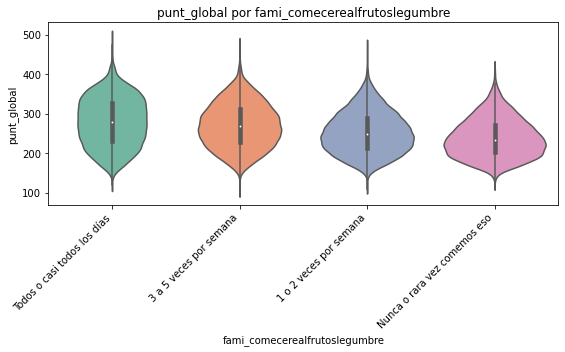

Análisis de fami_comelechederivados:
                              count  median        mean        std
fami_comelechederivados                                           
Todos o casi todos los días   64091     285  283.416892  59.161146
3 a 5 veces por semana        48440     261  263.188357  52.253581
1 o 2 veces por semana        58809     241  245.247921  49.020230
Nunca o rara vez comemos eso  15906     227  233.764177  49.178499


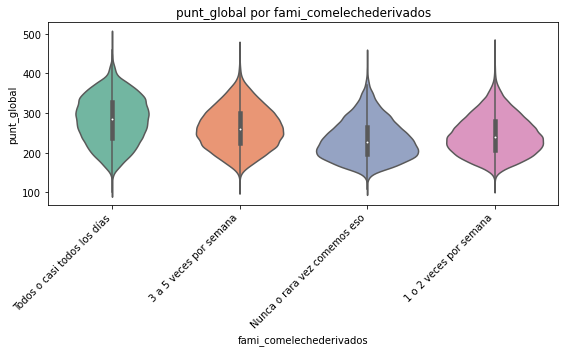

Análisis de fami_cuartoshogar:
                   count  median        mean        std
fami_cuartoshogar                                      
Tres               77328   265.0  267.715394  57.245093
Cuatro             25860   259.0  263.030704  58.548559
Dos                67227   253.0  257.438544  53.830849
Cinco               7450   250.5  256.053154  58.094281
Seis o mas          3800   241.0  245.505000  56.644739
Uno                 9364   235.0  239.893528  50.167760


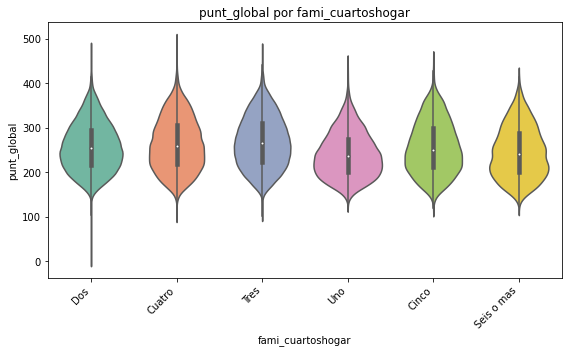

Análisis de fami_educacionmadre:
                                      count  median        mean        std
fami_educacionmadre                                                       
Postgrado                             10378     338  331.238196  47.863166
Educación profesional completa        32115     301  296.536291  55.618320
Educación profesional incompleta       6039     284  281.398245  53.486526
No sabe                                4871     272  269.757134  56.668878
Técnica o tecnológica completa        18847     272  272.496259  48.894544
Técnica o tecnológica incompleta       6165     263  263.408435  48.832996
Secundaria (Bachillerato) completa    47155     250  252.010964  48.160047
No Aplica                               389     240  244.812339  62.776631
Secundaria (Bachillerato) incompleta  22959     238  241.604469  45.636726
Primaria completa                     14786     231  234.846071  44.879680
Análisis de fami_educacionpadre:
                                  

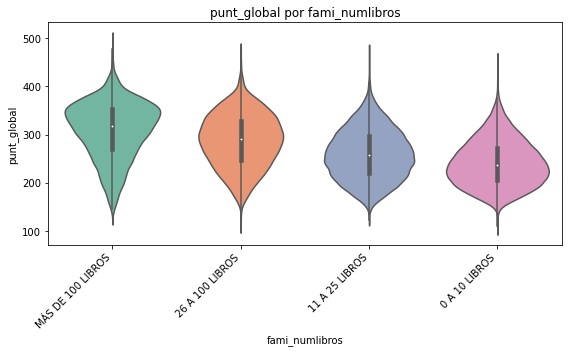

Análisis de fami_personashogar:
                     count  median        mean        std
fami_personashogar                                       
3 a 4               101775     266  268.914154  56.620491
1 a 2                17746     254  258.318889  56.814969
5 a 6                54376     250  255.187895  54.567529
7 a 8                12578     235  239.738591  50.201290
9 o más               4771     224  231.811151  50.927278


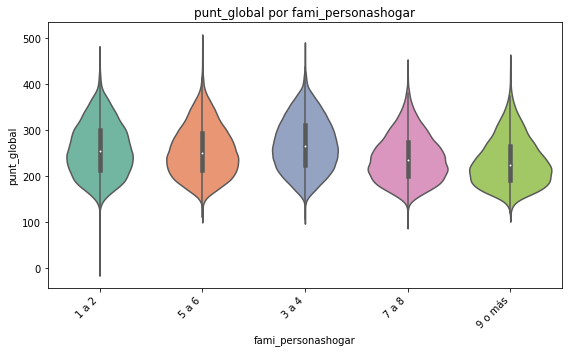

Análisis de fami_situacioneconomica:
                          count  median        mean        std
fami_situacioneconomica                                       
Peor                      30286     266  267.821006  56.109226
Igual                    116320     258  262.210213  55.604994
Mejor                     44189     248  254.214013  57.874980


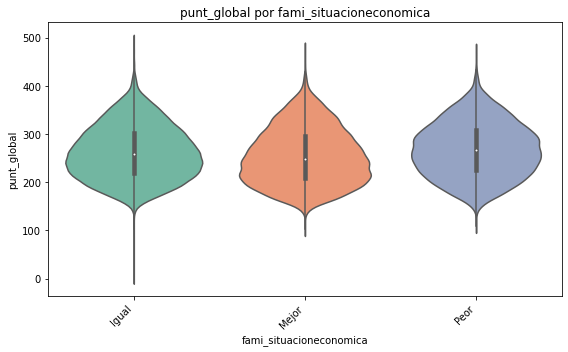

Análisis de fami_tieneautomovil:
                      count  median        mean        std
fami_tieneautomovil                                       
Si                    65847     292  288.407429  59.093787
No                   125028     243  247.062362  49.140846


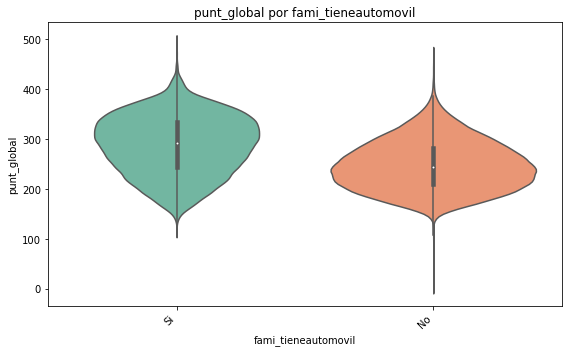

Análisis de fami_tienecomputador:
                       count  median        mean        std
fami_tienecomputador                                       
Si                    120582     276  276.543630  56.470686
No                     70680     230  235.099972  45.510258


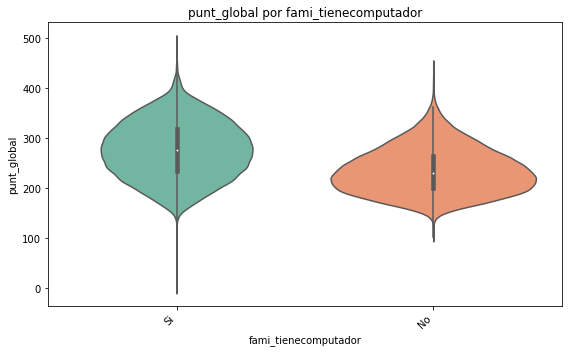

Análisis de fami_tieneconsolavideojuegos:
                               count  median        mean        std
fami_tieneconsolavideojuegos                                       
Si                             53367     290  286.988907  59.187528
No                            137493     247  251.382318  51.871158


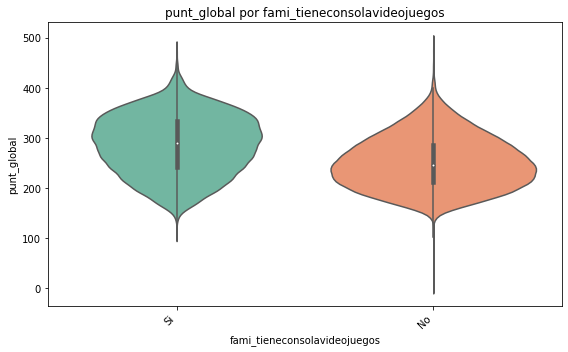

Análisis de fami_tienehornomicroogas:
                           count  median        mean        std
fami_tienehornomicroogas                                       
Si                        100041     276  276.074499  58.779986
No                         91111     241  244.996499  48.599284


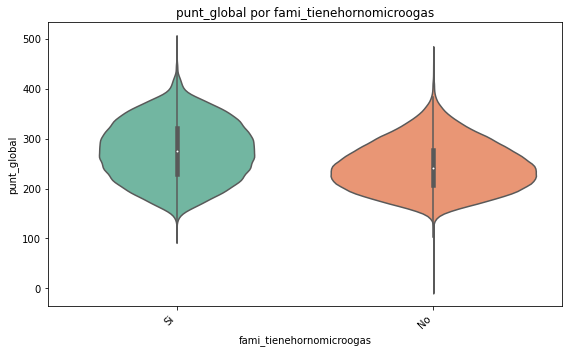

Análisis de fami_tieneinternet:
                     count  median        mean        std
fami_tieneinternet                                       
Si                  139114     271  272.502422  56.179497
No                   49373     227  232.078889  44.877921


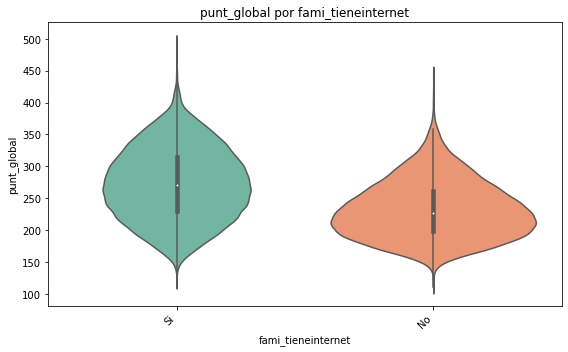

Análisis de fami_tienelavadora:
                     count  median        mean        std
fami_tienelavadora                                       
Si                  154394     264  266.990233  56.711485
No                   36856     232  237.084084  47.774381


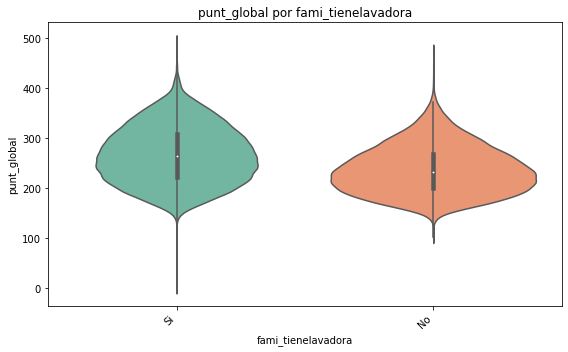

Análisis de fami_tienemotocicleta:
                        count  median        mean        std
fami_tienemotocicleta                                       
No                     114351     265  268.372476  58.153757
Si                      76798     247  250.602932  51.755125


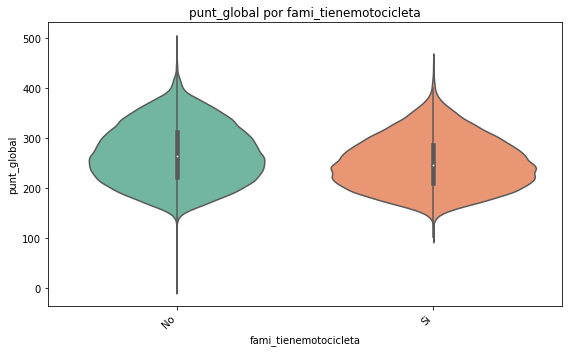

Análisis de fami_tieneserviciotv:
                       count  median        mean        std
fami_tieneserviciotv                                       
Si                    144759     265  267.594091  56.709372
No                     43327     238  243.225702  50.626551


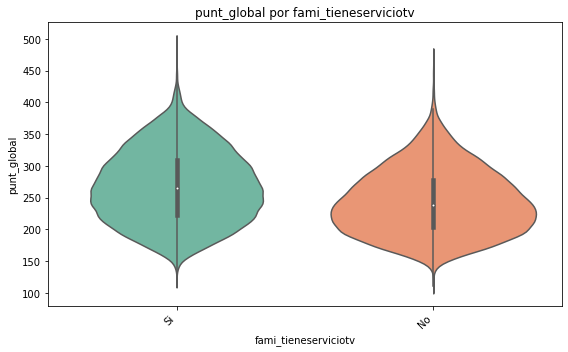

Correlación de variables numéricas con punt_global
                          punt_global  punt_global
periodo                      0.018706     0.018706
punt_c_naturales             0.932900     0.932900
punt_ingles                  0.832418     0.832418
punt_lectura_critica         0.914128     0.914128
punt_matematicas             0.916822     0.916822
punt_sociales_ciudadanas     0.927427     0.927427
edad                        -0.183628    -0.183628


In [37]:


meta = "punt_global"
numericas, categoricas = extraer_variables_tipo(df_familia)
analizar_categoricas(df_familia, categoricas, meta)
analizar_numericas(df_familia, numericas, meta)


variables numéricas (8):
 - periodo - punt_c_naturales - punt_global - punt_ingles - punt_lectura_critica - punt_matematicas - punt_sociales_ciudadanas - edad

variables categóricas (9):
 - estu_depto_reside - estu_genero - estu_mcpio_reside - estu_nse_individual - estu_tieneetnia - estu_dedicacioninternet - estu_dedicacionlecturadiaria - estu_horassemanatrabaja - estu_tiporemuneracion
Análisis de estu_depto_reside:
                   count  median        mean        std
estu_depto_reside                                      
BOGOTÁ             34182   283.0  283.426365  56.626356
VALLE              27817   277.0  276.820613  55.512936
SANTANDER           7943   265.0  268.131185  55.254239
BOYACA              4713   265.0  266.102695  47.924225
EXTRANJERO             5   262.0  256.800000  22.331592
CUNDINAMARCA       12471   261.0  263.680619  51.448992
RISARALDA           3434   260.0  263.801980  53.236704
QUINDIO             1755   260.0  264.965242  54.359948
NORTE SANTANDER     

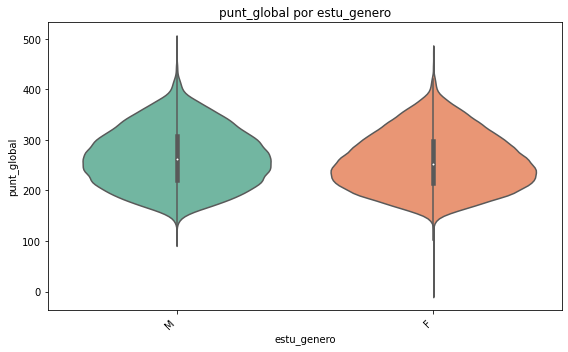

Análisis de estu_mcpio_reside:
                   count  median        mean        std
estu_mcpio_reside                                      
ALMEIDA                1   329.0  329.000000        NaN
LA CALERA            183   317.0  303.420765  56.761725
CAJICÁ               571   311.0  304.493870  51.935195
ENVIGADO            1225   310.0  302.909388  52.687302
BERBEO                 7   307.0  278.142857  55.675933
CHÍA                1185   303.0  297.156118  57.226657
SAN JOAQUÍN            7   302.0  287.285714  36.252422
TUTA                  23   302.0  288.260870  40.452236
COTA                 204   301.0  297.955882  53.619927
SOPÓ                 131   300.0  289.381679  57.823133
Análisis de estu_nse_individual:
                     count  median        mean        std
estu_nse_individual                                      
NSE4                 34160     325  319.609456  48.840954
NSE3                 72565     265  265.477117  49.548251
NSE2                 61832     2

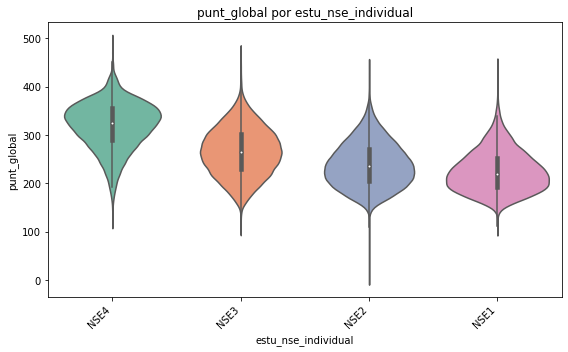

Análisis de estu_tieneetnia:
                  count  median        mean        std
estu_tieneetnia                                       
N                185792     259  262.870603  56.121566
S                  7858     212  221.453678  47.373193


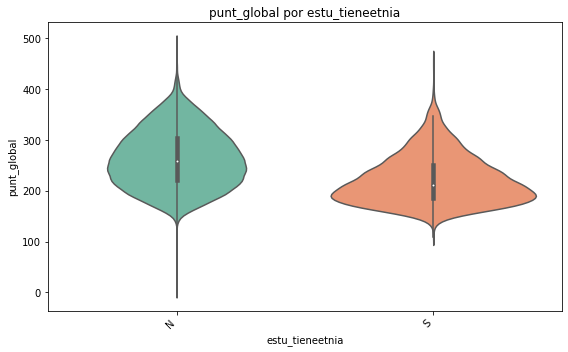

Análisis de estu_dedicacioninternet:
                         count  median        mean        std
estu_dedicacioninternet                                      
Más de 3 horas           47329     276  276.121701  55.482415
Entre 1 y 3 horas        61159     271  273.283278  56.370800
Entre 30 y 60 minutos    43829     248  252.761870  52.674057
30 minutos o menos       26829     232  238.123337  49.777680
No Navega Internet        8751     218  225.154611  48.345551


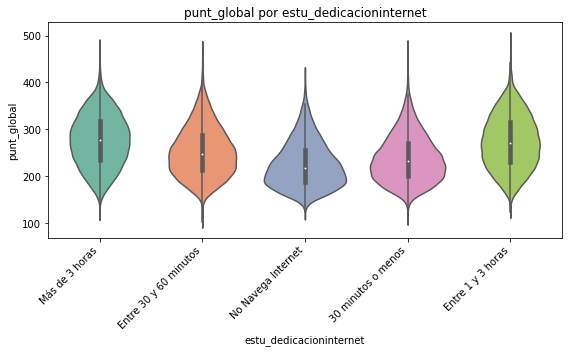

Análisis de estu_dedicacionlecturadiaria:
                              count  median        mean        std
estu_dedicacionlecturadiaria                                      
Más de 2 horas                 8028     280  277.719233  55.683288
Entre 1 y 2 horas             19032     273  272.929330  57.432966
Entre 30 y 60 minutos         49929     269  271.097979  55.876878
30 minutos o menos            70228     250  255.391653  55.135149
No leo por entretenimiento    41050     248  253.628063  55.528872


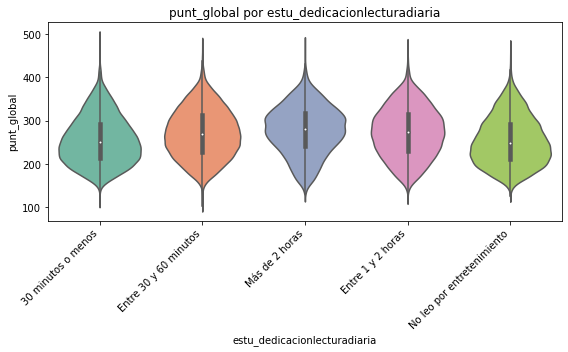

Análisis de estu_horassemanatrabaja:
                          count  median        mean        std
estu_horassemanatrabaja                                       
0                        124457     270  271.798252  56.883405
Entre 11 y 20 horas       15970     238  242.420914  48.078134
Menos de 10 horas         37021     238  242.993301  51.369336
Entre 21 y 30 horas        6146     237  240.970550  48.381451
Más de 30 horas            7549     227  231.304014  44.590314


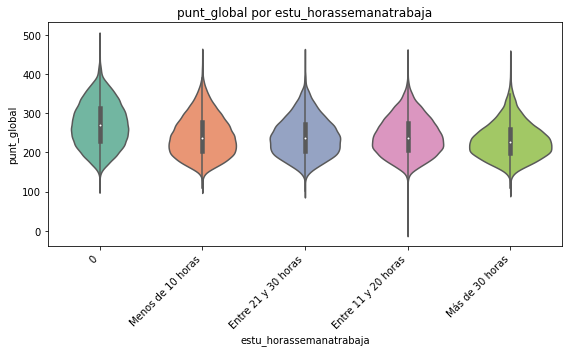

Análisis de estu_tiporemuneracion:
                            count  median        mean        std
estu_tiporemuneracion                                           
No                         134575     265  267.631016  57.460466
Si, en efectivo y especie    2875     244  247.914087  58.106463
Si, en especie               3310     242  246.025982  55.943734
Si, en efectivo             49970     241  245.489534  49.555227


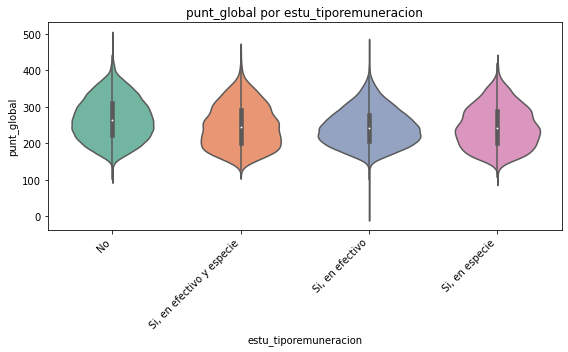

Correlación de variables numéricas con punt_global
                          punt_global  punt_global
periodo                      0.018706     0.018706
punt_c_naturales             0.932900     0.932900
punt_ingles                  0.832418     0.832418
punt_lectura_critica         0.914128     0.914128
punt_matematicas             0.916822     0.916822
punt_sociales_ciudadanas     0.927427     0.927427
edad                        -0.183628    -0.183628


In [38]:


meta = "punt_global"
numericas, categoricas = extraer_variables_tipo(df_otros)
analizar_categoricas(df_otros, categoricas, meta)
analizar_numericas(df_otros, numericas, meta)


variables numéricas (0):
 - 

variables categóricas (18):
 - fami_comecarnepescadohuevo - fami_comecerealfrutoslegumbre - fami_comelechederivados - fami_cuartoshogar - fami_educacionmadre - fami_educacionpadre - fami_numlibros - fami_personashogar - fami_situacioneconomica - fami_tieneautomovil - fami_tienecomputador - fami_tieneconsolavideojuegos - fami_tienehornomicroogas - fami_tieneinternet - fami_tienelavadora - fami_tienemotocicleta - fami_tieneserviciotv - estu_nse_individual
Relación de fami_comecarnepescadohuevo con estu_nse_individual:
estu_nse_individual               NSE1      NSE2      NSE3      NSE4
fami_comecarnepescadohuevo                                          
1 o 2 veces por semana        0.289865  0.471395  0.221085  0.017654
3 a 5 veces por semana        0.099627  0.393899  0.428694  0.077780
Nunca o rara vez comemos eso  0.456607  0.379246  0.143765  0.020381
Todos o casi todos los días   0.028753  0.183038  0.444920  0.343289


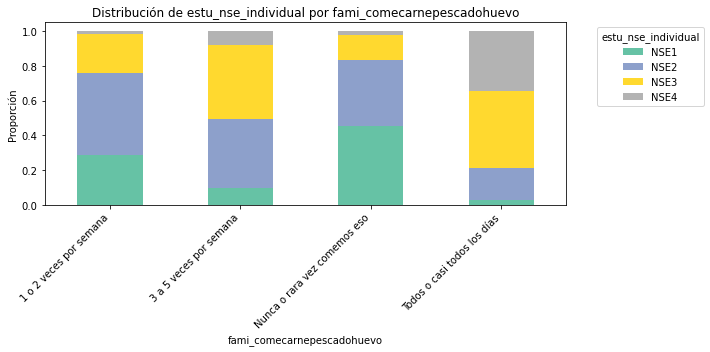

Relación de fami_comecerealfrutoslegumbre con estu_nse_individual:
estu_nse_individual                NSE1      NSE2      NSE3      NSE4
fami_comecerealfrutoslegumbre                                        
1 o 2 veces por semana         0.159590  0.393806  0.363744  0.082861
3 a 5 veces por semana         0.068784  0.274828  0.444293  0.212095
Nunca o rara vez comemos eso   0.323884  0.425432  0.221764  0.028920
Todos o casi todos los días    0.034880  0.173791  0.392288  0.399041


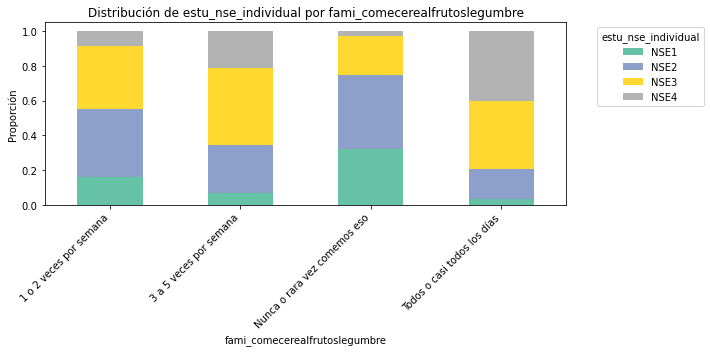

Relación de fami_comelechederivados con estu_nse_individual:
estu_nse_individual               NSE1      NSE2      NSE3      NSE4
fami_comelechederivados                                             
1 o 2 veces por semana        0.216174  0.467105  0.282355  0.034365
3 a 5 veces por semana        0.061457  0.330574  0.480904  0.127064
Nunca o rara vez comemos eso  0.437948  0.387904  0.152898  0.021250
Todos o casi todos los días   0.019644  0.149506  0.438236  0.392614


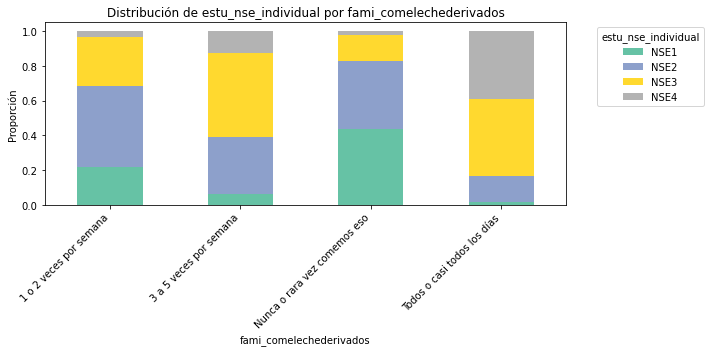

Relación de fami_cuartoshogar con estu_nse_individual:
estu_nse_individual      NSE1      NSE2      NSE3      NSE4
fami_cuartoshogar                                          
Cinco                0.086309  0.257450  0.426711  0.229530
Cuatro               0.083333  0.255182  0.408507  0.252978
Dos                  0.172922  0.384146  0.335847  0.107085
Seis o mas           0.080789  0.254474  0.486316  0.178421
Tres                 0.090368  0.280558  0.405519  0.223554
Uno                  0.329560  0.423857  0.211128  0.035455


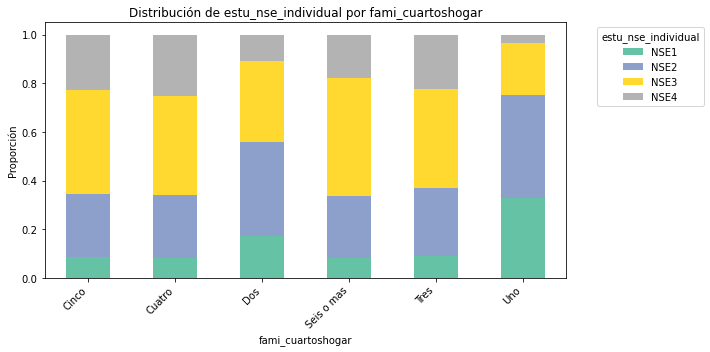

Relación de fami_educacionmadre con estu_nse_individual:
estu_nse_individual                       NSE1      NSE2      NSE3      NSE4
fami_educacionmadre                                                         
Educación profesional completa        0.004297  0.059598  0.369080  0.567025
Educación profesional incompleta      0.010101  0.131148  0.587349  0.271403
Ninguno                               0.646206  0.298949  0.054561  0.000284
No Aplica                             0.151671  0.300771  0.395887  0.151671
No sabe                               0.087456  0.235886  0.474441  0.202217
Postgrado                             0.002024  0.015899  0.108884  0.873193
Primaria completa                     0.292371  0.540849  0.164886  0.001894
Primaria incompleta                   0.469765  0.431894  0.097684  0.000658
Secundaria (Bachillerato) completa    0.064447  0.406426  0.505715  0.023412
Secundaria (Bachillerato) incompleta  0.144518  0.544884  0.305022  0.005575
Técnica o tecnológi

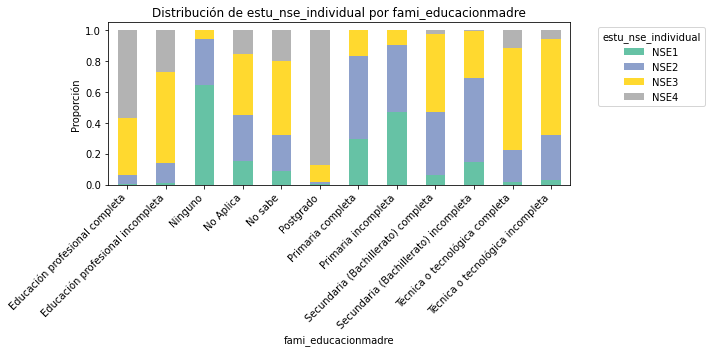

Relación de fami_educacionpadre con estu_nse_individual:
estu_nse_individual                       NSE1      NSE2      NSE3      NSE4
fami_educacionpadre                                                         
Educación profesional completa        0.004586  0.061419  0.336604  0.597391
Educación profesional incompleta      0.010197  0.127143  0.548058  0.314602
Ninguno                               0.548107  0.368531  0.081452  0.001910
No Aplica                             0.138441  0.338267  0.392686  0.130605
No sabe                               0.097853  0.296832  0.461925  0.143390
Postgrado                             0.001190  0.010708  0.072675  0.915427
Primaria completa                     0.228977  0.533218  0.231964  0.005841
Primaria incompleta                   0.396266  0.458521  0.142286  0.002927
Secundaria (Bachillerato) completa    0.047907  0.356066  0.549976  0.046051
Secundaria (Bachillerato) incompleta  0.100377  0.483871  0.390532  0.025220
Técnica o tecnológi

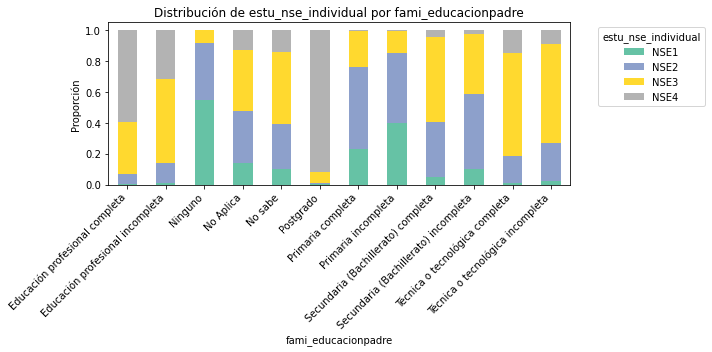

Relación de fami_numlibros con estu_nse_individual:
estu_nse_individual      NSE1      NSE2      NSE3      NSE4
fami_numlibros                                             
0 A 10 LIBROS        0.233269  0.428242  0.305893  0.032596
11 A 25 LIBROS       0.087277  0.338215  0.459948  0.114560
26 A 100 LIBROS      0.029258  0.173038  0.441118  0.356586
MÁS DE 100 LIBROS    0.015216  0.087489  0.269955  0.627340


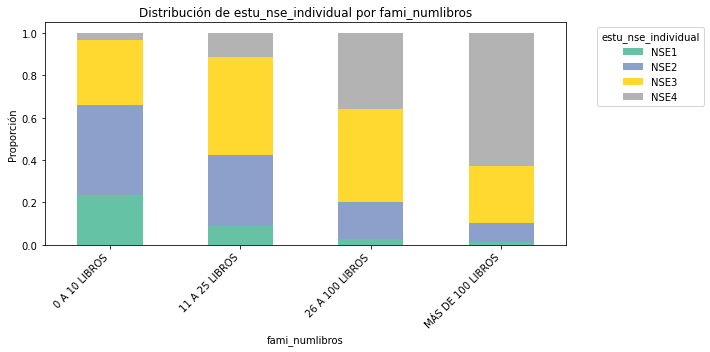

Relación de fami_personashogar con estu_nse_individual:
estu_nse_individual      NSE1      NSE2      NSE3      NSE4
fami_personashogar                                         
1 a 2                0.129100  0.328299  0.378451  0.164150
3 a 4                0.098207  0.284785  0.395667  0.221341
5 a 6                0.156153  0.357033  0.351920  0.134894
7 a 8                0.228653  0.395691  0.314756  0.060900
9 o más              0.250681  0.396353  0.309369  0.043597


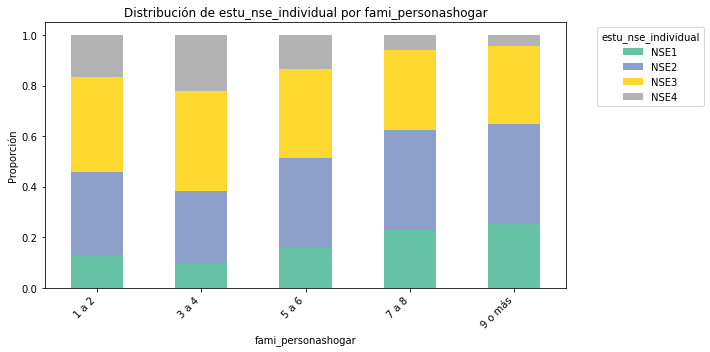

Relación de fami_situacioneconomica con estu_nse_individual:
estu_nse_individual          NSE1      NSE2      NSE3      NSE4
fami_situacioneconomica                                        
Igual                    0.135041  0.328422  0.366463  0.170074
Mejor                    0.076829  0.269434  0.428862  0.224875
Peor                     0.185927  0.355313  0.325629  0.133131


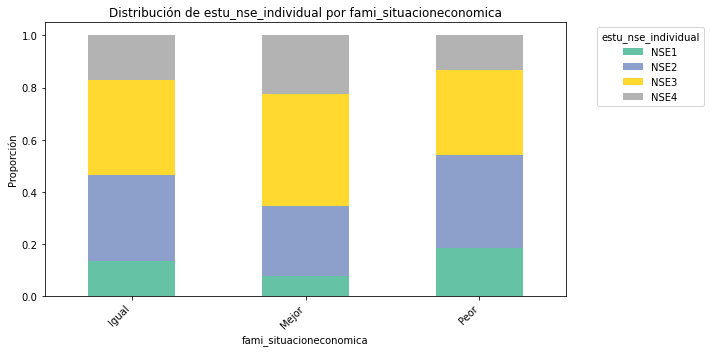

Relación de fami_tieneautomovil con estu_nse_individual:
estu_nse_individual      NSE1      NSE2      NSE3      NSE4
fami_tieneautomovil                                        
No                   0.191189  0.435502  0.347826  0.025482
Si                   0.012909  0.097438  0.424955  0.464698


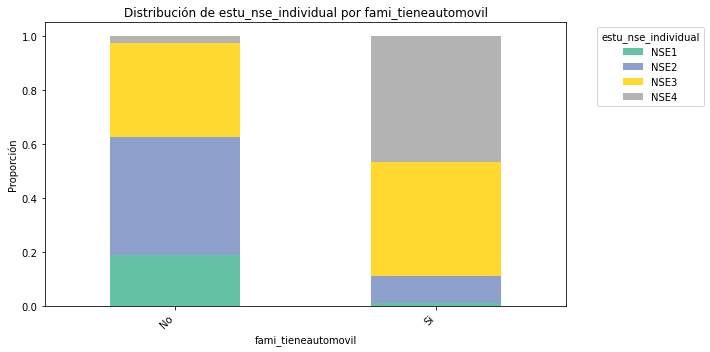

Relación de fami_tienecomputador con estu_nse_individual:
estu_nse_individual       NSE1      NSE2      NSE3      NSE4
fami_tienecomputador                                        
No                    0.332937  0.542417  0.123387  0.001259
Si                    0.010615  0.188030  0.521686  0.279669


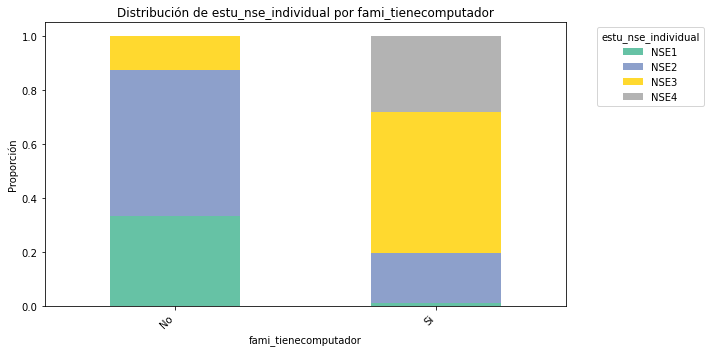

Relación de fami_tieneconsolavideojuegos con estu_nse_individual:
estu_nse_individual               NSE1      NSE2      NSE3      NSE4
fami_tieneconsolavideojuegos                                        
No                            0.177093  0.408246  0.351945  0.062716
Si                            0.006540  0.088913  0.433020  0.471527


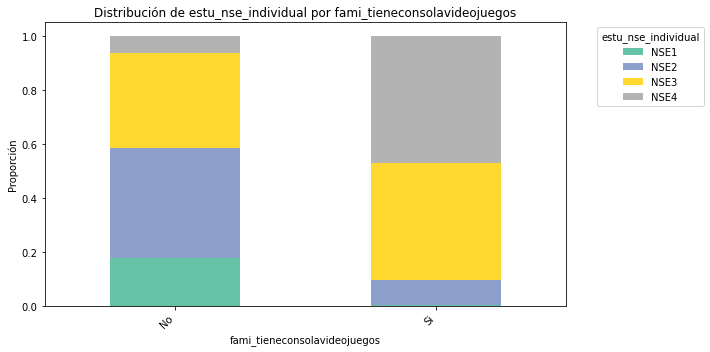

Relación de fami_tienehornomicroogas con estu_nse_individual:
estu_nse_individual           NSE1      NSE2      NSE3      NSE4
fami_tienehornomicroogas                                        
No                        0.247006  0.476232  0.262021  0.014740
Si                        0.022921  0.175918  0.476695  0.324467


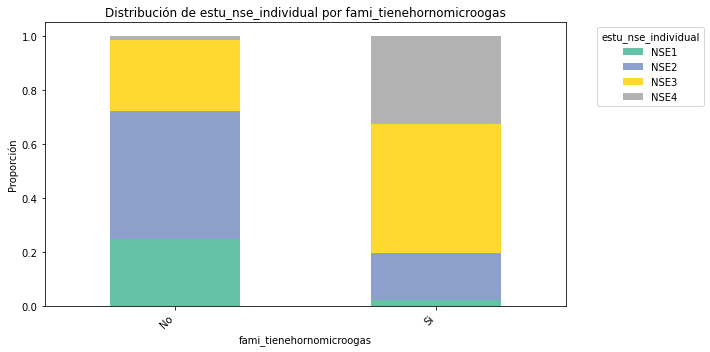

Relación de fami_tieneinternet con estu_nse_individual:
estu_nse_individual      NSE1      NSE2      NSE3      NSE4
fami_tieneinternet                                         
No                   0.436433  0.498714  0.063658  0.001195
Si                   0.018237  0.252347  0.486975  0.242441


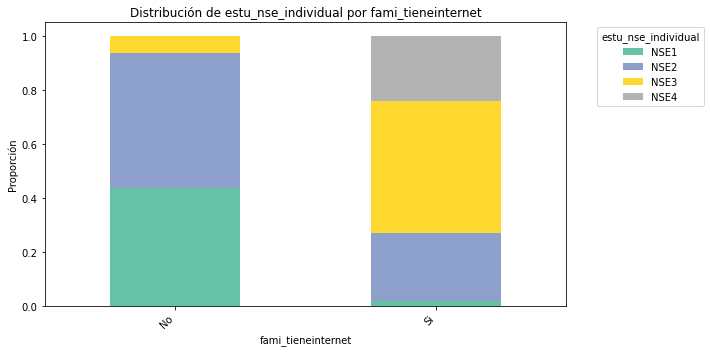

Relación de fami_tienelavadora con estu_nse_individual:
estu_nse_individual      NSE1      NSE2      NSE3      NSE4
fami_tienelavadora                                         
No                   0.442506  0.442235  0.111325  0.003934
Si                   0.055119  0.289603  0.437271  0.218007


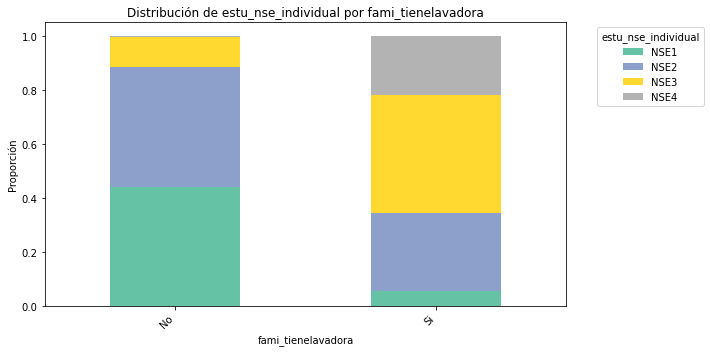

Relación de fami_tienemotocicleta con estu_nse_individual:
estu_nse_individual        NSE1      NSE2      NSE3      NSE4
fami_tienemotocicleta                                        
No                     0.134297  0.302359  0.341344  0.222001
Si                     0.123284  0.344462  0.423188  0.109065


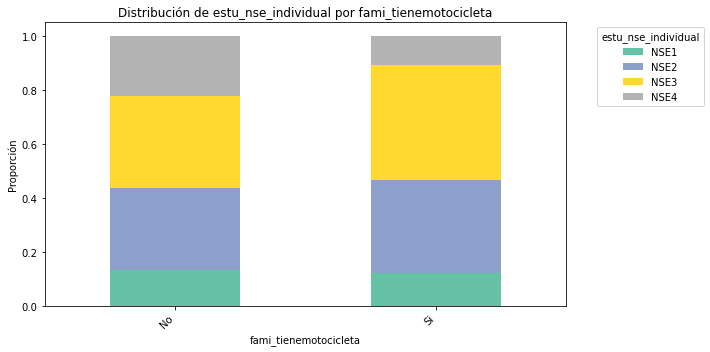

Relación de fami_tieneserviciotv con estu_nse_individual:
estu_nse_individual       NSE1      NSE2      NSE3      NSE4
fami_tieneserviciotv                                        
No                    0.356706  0.445657  0.179195  0.018441
Si                    0.059278  0.278090  0.435054  0.227578


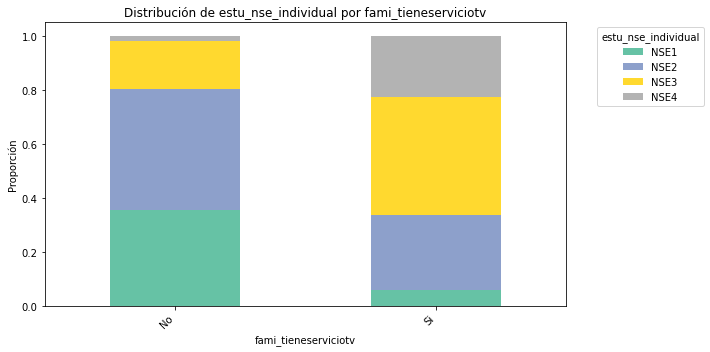

In [39]:

def analizar_con_nse_categoricas(df, categorias, meta='estu_nse_individual'):
    for cat in categorias:
        if cat == meta or cat not in df.columns:
            continue
        print(f"Relación de {cat} con {meta}:")
        resumen = df.groupby(cat)[meta].value_counts(normalize=True).unstack().fillna(0)
        print(resumen)
        
        ax = resumen.plot(kind='bar', stacked=True, figsize=(10,5), colormap='Set2')
        plt.title(f"Distribución de {meta} por {cat}")
        plt.ylabel("Proporción")
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=meta, bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda afuera
        plt.tight_layout()
        plt.show()
        
        
meta = "estu_nse_individual"
numericas, categoricas = extraer_variables_tipo(df_solo_familia)

# Analizar
analizar_con_nse_categoricas(df_solo_familia, categoricas, meta='estu_nse_individual')



## Fase 3: abordar relación variables-desempeño a través de un modelo

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librerías especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Los módulos correspondientes a regresión lineal y regresión logística pueden ser útiles.
* Asegurar el cumplimiento de los supuestos y buenas prácticas de cada modelo.
* Utilizar las métricas de evaluación de desempeño (disponibles en las librerías especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

# Despues de revisar y analizar los diferentes conjuntos de información se decide tomar el DF de información del estudiante junto con la información del colegio, es información relevante que puede brindar datos extras, aunque existen otras variables como complementarias, se puede  aproximar mas hacia las variables de interes que es la desigualdad. 
# Adicional a los datos del usuario con el colegio, se encuentra el nivel socioeconómico que es transversal tanto con las variables de la familia como las variables complementarias (como trabajo dedicacion a internet y lectura) en relación a las variables de familia podemos ver que aquellas que tienen beneficios para el estudiante, como comer comer proteina, frutas y legumbres, leche o derivados, educacion de padre y madre, numero de libros, entre otros, tienen una mayor presencia de estudiante con un nivel socioeconómico alto. entre las comparaciones previas también se evidencia que las variables de familia si influyen en los resultados, pero como ya se incluyo el valor del nse, se esta trabajando con un conjunto de datos mas completos. esto no quiere decir que las variables de familia dependen del nivel socio economico, pero en el caso de este trabajo se trabajo bajo esta suposición. 

In [40]:
# Implementa tu respuesta en esta celda
df_colegio = df_colegio[df_colegio["estu_fechanacimiento"].notna()]
df_colegio.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 192169 entries, 0 to 352247
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   estu_depto_reside         192169 non-null  object        
 1   estu_fechanacimiento      192169 non-null  datetime64[ns]
 2   estu_genero               192169 non-null  object        
 3   estu_mcpio_reside         192169 non-null  object        
 4   estu_nse_individual       192169 non-null  object        
 5   estu_tieneetnia           192169 non-null  object        
 6   periodo                   192169 non-null  int64         
 7   punt_c_naturales          192169 non-null  int64         
 8   punt_global               192169 non-null  int64         
 9   punt_ingles               192169 non-null  float64       
 10  punt_lectura_critica      192169 non-null  int64         
 11  punt_matematicas          192169 non-null  int64         
 12  pu

In [41]:


# Variables -  se retira municipio ya que son muchos datos genera overfitting
categoricas = [
    'estu_depto_reside', 'estu_genero', 'estu_nse_individual', 'estu_tieneetnia',
    'periodo', 'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario', 
    'cole_caracter', 'cole_depto_ubicacion', 'cole_genero', 'cole_jornada',
    'cole_naturaleza'
]

numericas = [ 'edad']

# Variable objetivo
df_modelo = df_colegio.copy()

y = df_modelo['punt_global']

# Crear dummies para variables categóricas
df_dummies = pd.get_dummies(df_modelo[categoricas], drop_first=True)

# Concatenar variables numéricas
X = pd.concat([df_dummies, df_modelo[numericas]], axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
X_train[numericas] = scaler.fit_transform(X_train[numericas])
X_test[numericas] = scaler.transform(X_test[numericas])

In [44]:
modelo1 = LinearRegression()
modelo1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# Predicciones
y_pred = modelo1.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f"R^2: {r2:.3f}")
print(f"Adjusted R^2: {adj_r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

R^2: 0.402
Adjusted R^2: 0.400
MSE: 1875.715
RMSE: 43.310
MAE: 34.816


####  Con el modelo lineal logramos explicar alrededor del 40 % de la variabilidad del puntaje global usando factores sociodemográficos y del colegio.  el desempeño como tal tiene una eficiencia medio-baja, por lo que podemos concluir que las variables seleccionadas pueden describir parte de puntaje global pero otras variables como las de familia, u otras variables que no se han capturado pueden describir mejor el puntaje global. 
#### el puntaje max es de 500, tenemos un RMSE de 43  por lo que podemos estar arriba o abajo del puntaje global sobre este numero. 


In [46]:



# Copiar el DataFrame
df_modelo2 = df_colegio.copy()

# Definir variables
predictoras_cat = [
    'estu_depto_reside', 'estu_genero', 'estu_nse_individual', 'estu_tieneetnia',
    'periodo', 'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario', 
    'cole_caracter', 'cole_depto_ubicacion', 'cole_genero', 'cole_jornada',
    'cole_naturaleza'
]
# Crear dummies
df_dummies = pd.get_dummies(df_modelo2[predictoras_cat], drop_first=True)


# Incluir edad
X = pd.concat([df_modelo2[['edad']], df_dummies], axis=1)
y = df_modelo2['punt_global']


In [47]:
# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [48]:
# Crear y entrenar modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [49]:
y_pred = rf.predict(X_test)

In [50]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R^2: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

R^2: 0.369
MSE: 1982.531
RMSE: 44.526
MAE: 35.509


#### A compración de regresion linea, random forest no es mejor esto es debido a que existen variables o relaciones lineales. de acuerdo a esto, el comportamiento de las variables puede ser mas lineales. 

#### hay una mayor dispersión entre los datos que se han estimado en mas o menos 44 puntos, no es mucha diferente pero es menos eficiente. 

## Fase 4

Deberás elegir y realizar una de las dos alternativas que se encuentran a continuación.

### Alternativa 1: desarrollar una herramienta interactiva de análisis

En esta fase desarrollarás, a partir de alguno de los análisis realizados, una herramienta interactiva que sea relevante en el contexto del problema, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

Pautas generales:

* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar el/los parámetro(s) que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar una librería especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

Preguntas guía:

* ¿Cuál o cuáles preguntas podrá hacerle el usuario a la herramienta y cómo aporta la respuesta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

In [51]:


# DataFrame completo
df = df_limpio_p1.copy()  
objetivo = "punt_global"

# Columnas de puntuación que NO se deben usar como predictores
columnas_puntajes = [
    'punt_c_naturales', 'punt_ingles', 'punt_lectura_critica', 
    'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_global'
]

# Columnas disponibles para cada grupo
columnas_generales = [c for c in [
    'estu_depto_reside', 'estu_genero',
    'estu_nse_individual', 'estu_tieneetnia','edad'
] if c not in columnas_puntajes]

columnas_colegio = [c for c in [
    'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario', 'cole_caracter',
    'cole_depto_ubicacion', 'cole_genero', 'cole_jornada', 
    'cole_naturaleza'
] if c not in columnas_puntajes]

columnas_familia = [c for c in [
    'fami_comecarnepescadohuevo', 'fami_comecerealfrutoslegumbre', 'fami_comelechederivados',
    'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre', 'fami_numlibros',
    'fami_personashogar', 'fami_situacioneconomica', 'fami_tieneautomovil', 'fami_tienecomputador',
    'fami_tieneconsolavideojuegos', 'fami_tienehornomicroogas', 'fami_tieneinternet',
    'fami_tienelavadora', 'fami_tienemotocicleta', 'fami_tieneserviciotv'
] if c not in columnas_puntajes]

columnas_otros = [c for c in [
    'estu_dedicacioninternet', 'estu_dedicacionlecturadiaria',
    'estu_horassemanatrabaja', 'estu_tiporemuneracion'
] if c not in columnas_puntajes]

# Función para crear checkboxes por categoría
def crear_checkboxes(columnas):
    return [widgets.Checkbox(value=False, description=c) for c in columnas]

checkbox_generales = crear_checkboxes(columnas_generales)
checkbox_colegio = crear_checkboxes(columnas_colegio)
checkbox_familia = crear_checkboxes(columnas_familia)
checkbox_otros = crear_checkboxes(columnas_otros)

# Acordeón con checkboxes
accordion = widgets.Accordion(children=[
    widgets.VBox(checkbox_generales),
    widgets.VBox(checkbox_colegio),
    widgets.VBox(checkbox_familia),
    widgets.VBox(checkbox_otros)
])
accordion.set_title(0, 'Generales')
accordion.set_title(1, 'Colegio')
accordion.set_title(2, 'Familia')
accordion.set_title(3, 'Otros')

# Botón para entrenar
boton = widgets.Button(description="Entrenar modelo")

# Output
output = widgets.Output()
# Función de entrenamiento interactivo
# Output lateral para logs
output_logs = widgets.Output(layout={'border': '1px solid black', 'width': '50%'})
display(output_logs)

def entrenar_modelo(b):
    seleccionadas = [cb.description for cb in checkbox_generales if cb.value] + \
                    [cb.description for cb in checkbox_colegio if cb.value] + \
                    [cb.description for cb in checkbox_familia if cb.value] + \
                    [cb.description for cb in checkbox_otros if cb.value]
    
    with output_logs:
        output_logs.clear_output(wait=False)  # limpiar logs anteriores
        if not seleccionadas:
            print("Por favor, selecciona al menos una variable.")
            return
        
        print("✅ Variables seleccionadas:")
        print(seleccionadas)
        print("\nEntrenando modelo... ⏳")
    
    # Preparar datos
    X = df_limpio_p1[seleccionadas].copy()
    y = df_limpio_p1[objetivo].copy()
    
    # Convertir categóricas a dummies
    X = pd.get_dummies(X, drop_first=True)
    
    # Separar entrenamiento/prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entrenar modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    
    # Predicciones y métricas
    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    
    # Mostrar métricas
    with output_logs:
        print("\n✅ Modelo entrenado con éxito")
        print(f"R^2: {r2:.3f}")
        print(f"MSE: {mse:.3f}")
        print(f"RMSE: {rmse:.3f}")
        print(f"MAE: {mae:.3f}")
boton.on_click(entrenar_modelo)

# Mostrar todo
display(widgets.VBox([accordion, boton, output]))

Output(layout=Layout(border='1px solid black', width='50%'))

### Alternativa 2: registrar en bases de datos relacionales con PySpark

En esta fase desarrollarás, a partir de alguno de los análisis realizados, un _script_ que sea relevante en el contexto del problema, acompañado de las instrucciones necesarias para que un usuario lo pueda ejecutar.

Pautas generales:

* Cargar en una base de datos relacional (tipo SQL) el segmento de los datos sobre el cual profundizaste en tu anális, utilizando una tabla distinta para cada categoría de campos. Por ejemplo, una categoría puedes ser información del colegio; en cuyo caso, una tabla debería contener un registro único para cada colegio y todos los campos asociados.

* Los campos, a excepción de los identificadores, deben existir en un única tabla.

* Cada registro debe existir una única vez en su respectiva tabla.

* Cada registro debe tener un identificador único en su tabla, el cual establece una relación entre tablas.

* Seleccionar uno de los modelos predictivos implementados.

* Crear en la base de datos relacional una tabla que contenga únicamente los identificadores del registro y la predicción de la variable de respuesta hecha por el modelo.

* Desarrollar _queries_ de SQL según las siguientes indicaciones y concluir acerca de los resultados:
    * Un _query_ que seleccione todos registros y los agregue en una única tabla. Para esto debes relacionar las tablas por su identificador, utilizando el método `JOIN`.
    * Un _query_ que contenga el puntaje promedio de los estudiantes, agrupado por año y por colegio.
    * Distintos _queries_ que calculen medidas de error de predicción del modelo a partir de los datos reales y las predicciones respectivas. Debes reportar el error para cada registro, el error total de los registros de entrenamiento y el error total de los registros de prueba.
    * Haz dos _queries_ adicionales que resulten interesantes.

Preguntas guía:

* ¿Cómo aporta la segmentación de los datos en categorías de campos al manejo de los datos?
* ¿Qué filtros y agrupaciones podemos aplicar sobre los datos con el fin de obtener información relevante?

In [ ]:
# Implementa tu respuesta en esta celda


## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn <br> https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Jose Fernando Barrera de Plaza, Diego Alejandro Cely Gómez.

__Fecha última actualización__: 29/09/2022